In [2]:
#import library and yahoo finance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import random, warnings
import talib as tl
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, ElasticNet, BayesianRidge
pd.options.display.float_format = "{:,.3f}".format
warnings.simplefilter(action='ignore', category=FutureWarning)
random.seed(123)
N225_4y = pdr.get_data_yahoo("^N225", start="2012-01-01", end="2015-12-31") #Nikkei 225 4Y
N225_7y = pdr.get_data_yahoo("^N225", start="2012-01-01", end="2018-12-31") #Nikkei 225 7Y
HSI_4y = pdr.get_data_yahoo("^HSI", start="2012-01-01", end="2015-12-31") #HANG SENG INDEX 4Y
HSI_7y = pdr.get_data_yahoo("^HSI", start="2012-01-01", end="2018-12-31") #HANG SENG INDEX 7Y
SSE_4y = pdr.get_data_yahoo("000001.SS", start="2012-01-01", end="2015-12-31") #SSE Composite Index 4Y
SSE_7y = pdr.get_data_yahoo("000001.SS", start="2012-01-01", end="2018-12-31") #SSE Composite Index 7Y
DJI_4y = pdr.get_data_yahoo("^DJI", start="2012-01-01", end="2015-12-31") #Dow Jones Industrial Average 4Y
DJI_7y = pdr.get_data_yahoo("^DJI", start="2012-01-01", end="2018-12-31") #Dow Jones Industrial Average 7Y

# Regression

## -------------------------------------------------------------------------------------------------------------------------

## Linear Regression N225_4Y

### Input Data

In [53]:
# Input Data
open = N225_4y['Open']
close = N225_4y['Close']
high = N225_4y['High']
low = N225_4y['Low']
Adjclose = N225_4y['Adj Close']
volume = N225_4y['Volume']

#indicator that we use
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    

#append the indicator into Dataset
N225_4y['SMA5'] = pd.DataFrame(SMA5)
N225_4y['SMA10'] = pd.DataFrame(SMA10)
N225_4y['SMA14'] = pd.DataFrame(SMA14)
N225_4y['SMA30'] = pd.DataFrame(SMA30)
N225_4y['EMA5'] = pd.DataFrame(EMA5)
N225_4y['EMA10'] = pd.DataFrame(EMA10)
N225_4y['EMA14'] = pd.DataFrame(EMA14)
N225_4y['EMA30'] = pd.DataFrame(EMA30)
N225_4y['MOM5'] = pd.DataFrame(EMA5)
N225_4y['MOM10'] = pd.DataFrame(MOM10)
N225_4y['MOM14'] = pd.DataFrame(MOM14)
N225_4y['RSI14'] = pd.DataFrame(RSI14)
N225_4y['RSI28'] = pd.DataFrame(RSI28)
N225_4y['WILLR14'] = pd.DataFrame(WILLR14)
N225_4y['WILLR28'] = pd.DataFrame(WILLR28)
N225_4y['AD'] = pd.DataFrame(AD)
N225_4y['CCI14'] = pd.DataFrame(CCI14)
N225_4y['CCI28'] = pd.DataFrame(CCI28)
N225_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
N225_4y['MACD'] = pd.DataFrame(MACD)
N225_4y['macdhist'] = pd.DataFrame(macdhist)
N225_4y['STOCHK'] = pd.DataFrame(STOCHK)
N225_4y['STOCHD'] = pd.DataFrame(STOCHD)
n225_cor4y = N225_4y



                 High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2012-01-04  8,581.450  8,547.700  8,549.540  8,560.110  106000000  8,560.110   
2012-01-05  8,519.160  8,481.830  8,515.660  8,488.710   77700000  8,488.710   
2012-01-06  8,488.980  8,349.330  8,488.980  8,390.350  101300000  8,390.350   
2012-01-10  8,450.590  8,405.180  8,422.990  8,422.260  112300000  8,422.260   
2012-01-11  8,463.720  8,426.030  8,440.960  8,447.880  106200000  8,447.880   
...               ...        ...        ...        ...        ...        ...   
2015-12-24 19,071.410 18,780.939 19,071.410 18,789.689  129500000 18,789.689   
2015-12-25 18,870.699 18,744.439 18,823.910 18,769.061  122600000 18,769.061   
2015-12-28 18,922.900 18,764.539 18,838.910 18,873.350  102300000 18,873.350   
2015-12-29 18,991.010 18,783.359 18,843.391 18,982.230   96900000 18,982.230   
2015-12-30 19,113.180 19,017.270 19,070.

### Scaler and Imputer Data

In [54]:
# Phase Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

#use SimpleImputer for change the NaN value -> mean value
imp = SimpleImputer()

# use StandardScaler for scale the dataset
scaler =  StandardScaler()
X = n225_cor4y
y = n225_cor4y['Close'].shift(-1)
y.fillna(n225_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
# fit the data into dataset
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

### RFE Feature Selection

In [55]:
# use RFE Feature Selection to select the best feature (Indicator) from 22 features -> 5 features
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
model = LinearRegression(fit_intercept=True)

# Use model to find the best feature
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)


5
[ True False  True False  True False  True False  True False False False
 False False False False False False False False False False False]
[ 1  2  1  4  1  3  1  5  1  7  8  9 14 13 12  6 15 10 19 18 11 17 16]


#### input feature for RFE

In [56]:
# select the final feature from RFE
mod_X = final_X.iloc[:, [0,2,4,6,8]].values
mod_y = y.values

### train test data

In [57]:
# split data to train test
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)
X_test.shape

(148, 5)

### input to model and predict

R-sqrt =  0.9867302262763068
Model Coefficients: [-6839.81898263 -3566.76926072  5353.71303231  3456.22571284
  5353.71303231]
Mean Squared Error: 96048.10683300991
Root Mean Square Error: 309.91629004137536
Mean Absolute Error: 221.86838326075
Coefficient of Determination: 0.9045003193773196


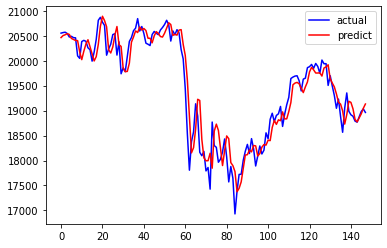

range(0, 148)
[20551.4609375  20563.15039062 20569.86914062 20543.18945312
 20473.50976562 20488.18945312 20460.90039062 20457.18945312
 20096.30078125 20046.359375   20382.97070312 20407.08007812
 20387.7890625  20257.93945312 20219.26953125 19990.8203125
 20174.24023438 20428.18945312 20809.41992188 20868.02929688
 20771.40039062 20706.15039062 20109.94921875 20235.73046875
 20329.3203125  20522.5        20539.7890625  20112.11914062
 20376.58984375 19737.640625   19855.5        19779.83007812
 20089.76953125 20385.33007812 20463.33007812 20600.11914062
 20650.91992188 20841.97070312 20593.66992188 20683.94921875
 20544.52929688 20350.09960938 20328.890625   20302.91015625
 20522.83007812 20585.24023438 20548.109375   20520.359375
 20614.06054688 20664.43945312 20724.56054688 20808.68945312
 20720.75       20392.76953125 20595.55078125 20519.44921875
 20620.25976562 20554.47070312 20222.63085938 20033.51953125
 19435.83007812 18540.6796875  17806.69921875 18376.83007812
 18574.439453

In [59]:
# input dataset into model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True, copy_X=True, normalize=False)
model.fit(mod_X, mod_y)
# predict the test data that we split
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test, color='b')
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual', 'predict'])
plt.show()
n225_4y_realplot_X = range(len(X_test))
n225_4y_realplot_y = y_test
n225_4y_linear_predict_plot = y_pred

In [60]:
# create up/down value from actual data to create the accuracy_score of Regression model
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
# use confusion_matrix to calculate accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5743243243243243


array([[41, 29],
       [34, 44]], dtype=int64)

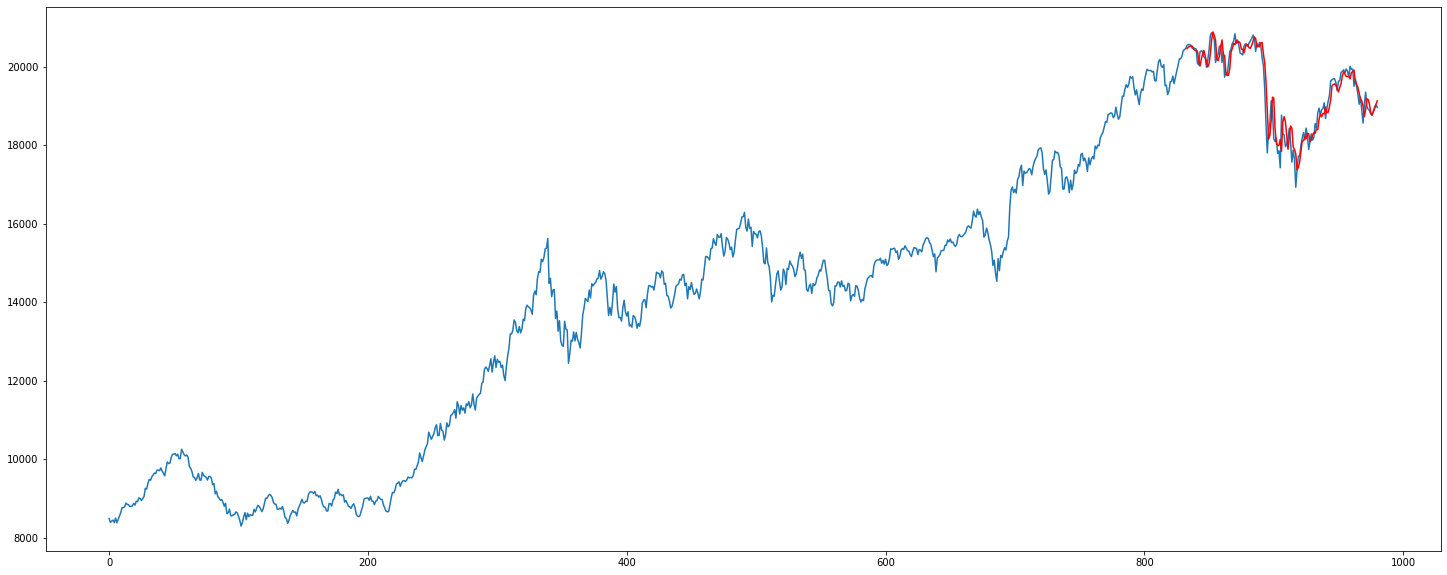

In [62]:
## print the actual data and predict data by plot graph
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))
plt.figure(figsize=(25,10))
plt.plot(actual)
plt.plot(new_predict[-148:], color='r')

In [63]:
print(actual.shape)
print(new_predict.shape)

(981, 1)
(981, 1)


## Linear Regression N225_7Y

In [64]:
open = N225_7y['Open']
close = N225_7y['Close']
high = N225_7y['High']
low = N225_7y['Low']
Adjclose = N225_7y['Adj Close']
volume = N225_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
N225_7y['SMA5'] = pd.DataFrame(SMA5)
N225_7y['SMA10'] = pd.DataFrame(SMA10)
N225_7y['SMA14'] = pd.DataFrame(SMA14)
N225_7y['SMA30'] = pd.DataFrame(SMA30)
N225_7y['EMA5'] = pd.DataFrame(EMA5)
N225_7y['EMA10'] = pd.DataFrame(EMA10)
N225_7y['EMA14'] = pd.DataFrame(EMA14)
N225_7y['EMA30'] = pd.DataFrame(EMA30)
N225_7y['MOM5'] = pd.DataFrame(MOM5)
N225_7y['MOM10'] = pd.DataFrame(MOM10)
N225_7y['MOM14'] = pd.DataFrame(MOM14)
N225_7y['RSI14'] = pd.DataFrame(RSI14)
N225_7y['RSI28'] = pd.DataFrame(RSI28)
N225_7y['WILLR14'] = pd.DataFrame(WILLR14)
N225_7y['WILLR28'] = pd.DataFrame(WILLR28)
N225_7y['AD'] = pd.DataFrame(AD)
N225_7y['CCI14'] = pd.DataFrame(CCI14)
N225_7y['CCI28'] = pd.DataFrame(CCI28)
N225_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
N225_7y['MACD'] = pd.DataFrame(MACD)
N225_7y['macdhist'] = pd.DataFrame(macdhist)
N225_7y['STOCHK'] = pd.DataFrame(STOCHK)
N225_7y['STOCHD'] = pd.DataFrame(STOCHD)
n225_cor7y = N225_7y

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = n225_cor7y
y = n225_cor7y['Close'].shift(-1)
y.fillna(n225_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

In [66]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True False  True False False False False False
 False False False False False False False False False False False]
[ 1  1  1  3  1  2  1  4  7  6 13  9 10  8 15  5 18 14 17 11 12 19 16]


In [67]:
mod_X = final_X.iloc[:, [0,1,2,4,6]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)
X_train.shape

(1461, 5)

[22583.33848466 22483.1552113  22722.83933587 22841.11729755
 22898.60441004 22885.66003465 22820.33743159 22884.64714093
 22847.87201785 22848.74299904 22766.89274427 22731.86595133
 23225.00813174 23594.45474652 23824.84010919 23753.14526584
 23528.64999783 23497.90278505 23571.41921948 23816.95717278
 23880.06857011 23803.20890149 23739.55114429 23694.57433927
 23923.21336492 23882.94989552 23656.54685649 23518.88972974
 23460.15028397 23342.80407681 23170.66812794 23310.995619
 23281.10288444 22936.52704874 22000.65830772 21542.69156047
 21748.50614191 21694.24781236 21622.66610815 21305.61156118
 21383.53569571 21749.48165185 22131.81024474 22098.2846888
 21992.86474594 21829.61477553 21903.39884725 22253.39010233
 22499.31659214 22402.88691153 22016.92584762 21429.2291415
 21115.76452311 21365.45886225 21430.73453422 21531.23935339
 21529.42230482 21667.49087418 21909.4905351  21803.43501639
 21737.56776205 21612.05176227 21533.66706296 21509.89147274
 21619.31852607 21055.168869

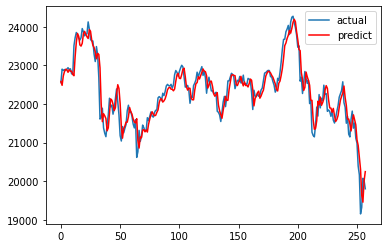

In [69]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
n225_7y_realplot_X = range(len(X_test))
n225_7y_realplot_y = y_test
n225_7y_linear_predict_plot = y_pred

In [70]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5193798449612403


array([[66, 59],
       [65, 68]], dtype=int64)

In [71]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))

(1719, 1)
(1719, 1)


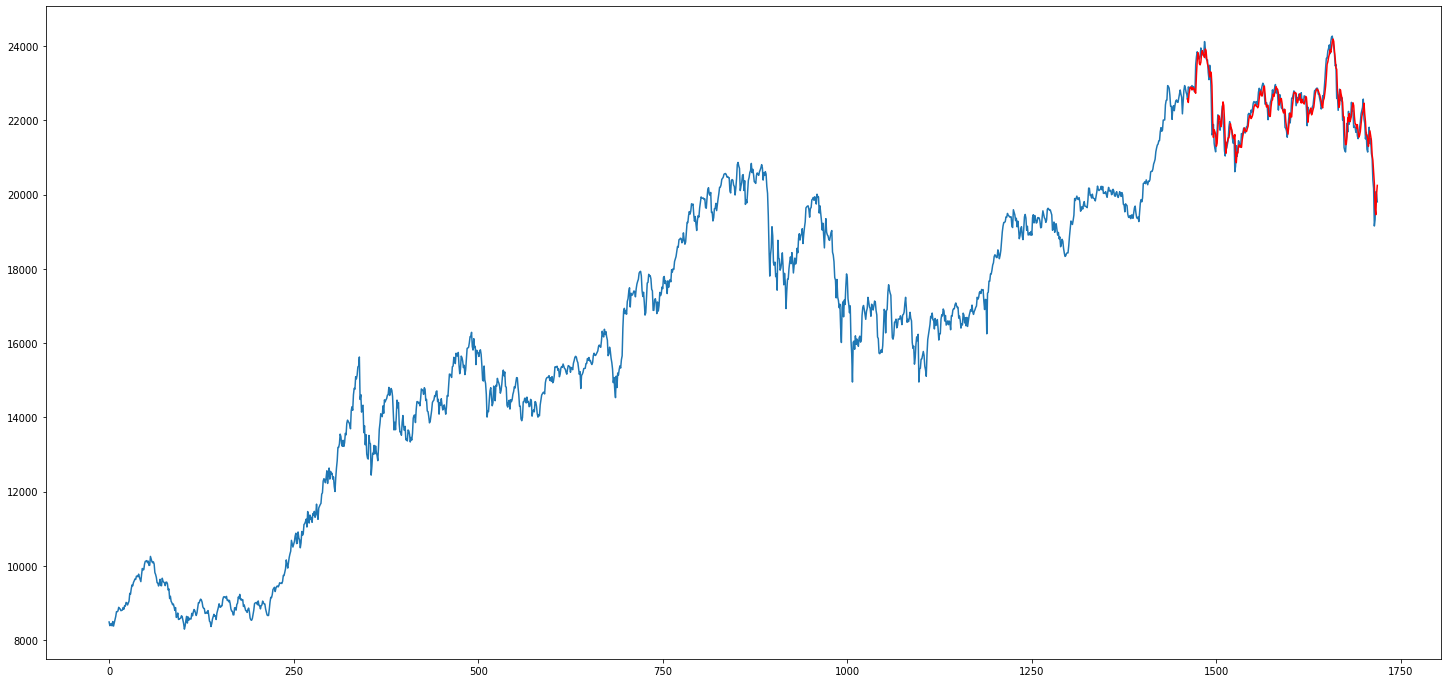

In [72]:
plt.figure(figsize=(25,12))
plt.plot(actual)
plt.plot(new_predict[-258:], color='r')

In [73]:
# this is the test predict the new day price 
current_price = final_X.tail(1)
print(current_price)
new_current_price = pd.DataFrame()
new_current_price['sar'] = current_price.iloc[:, [7]]
new_current_price['obv'] = current_price.iloc[:, [8]]
print(new_current_price)
new_current_price = new_current_price.values
pred_price = model.predict(new_current_price)
pred_price

## Linear Regression HSI_4Y

In [74]:
open = HSI_4y['Open']
close = HSI_4y['Close']
high = HSI_4y['High']
low = HSI_4y['Low']
Adjclose = HSI_4y['Adj Close']
volume = HSI_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
HSI_4y['SMA5'] = pd.DataFrame(SMA5)
HSI_4y['SMA10'] = pd.DataFrame(SMA10)
HSI_4y['SMA14'] = pd.DataFrame(SMA14)
HSI_4y['SMA30'] = pd.DataFrame(SMA30)
HSI_4y['EMA5'] = pd.DataFrame(EMA5)
HSI_4y['EMA10'] = pd.DataFrame(EMA10)
HSI_4y['EMA14'] = pd.DataFrame(EMA14)
HSI_4y['EMA30'] = pd.DataFrame(EMA30)
HSI_4y['MOM5'] = pd.DataFrame(MOM5)
HSI_4y['MOM10'] = pd.DataFrame(MOM10)
HSI_4y['MOM14'] = pd.DataFrame(MOM14)
HSI_4y['RSI14'] = pd.DataFrame(RSI14)
HSI_4y['RSI28'] = pd.DataFrame(RSI28)
HSI_4y['WILLR14'] = pd.DataFrame(WILLR14)
HSI_4y['WILLR28'] = pd.DataFrame(WILLR28)
HSI_4y['AD'] = pd.DataFrame(AD)
HSI_4y['CCI14'] = pd.DataFrame(CCI14)
HSI_4y['CCI28'] = pd.DataFrame(CCI28)
HSI_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
HSI_4y['MACD'] = pd.DataFrame(MACD)
HSI_4y['macdhist'] = pd.DataFrame(macdhist)
HSI_4y['STOCHK'] = pd.DataFrame(STOCHK)
HSI_4y['STOCHD'] = pd.DataFrame(STOCHD)
hsi_cor4y = HSI_4y

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

# scaler =  RobustScaler()
# scaler =  MinMaxScaler()
scaler =  StandardScaler()
X = hsi_cor4y
y = hsi_cor4y['Close'].shift(-1)
y.fillna(hsi_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

        0      1      2      3      4      5      6      7      8      9   \
0    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
1    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
2    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
3    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
4   -2.019  0.000  0.000  0.000 -2.026  0.000 -0.000  0.000  0.000 -0.000   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
979 -0.389 -0.502 -0.483 -0.340 -0.370 -0.418 -0.418 -0.364  0.453  0.510   
980 -0.372 -0.478 -0.494 -0.349 -0.376 -0.414 -0.416 -0.369  0.268  0.538   
981 -0.351 -0.442 -0.490 -0.349 -0.365 -0.404 -0.409 -0.370  0.347  0.834   
982 -0.345 -0.410 -0.487 -0.356 -0.379 -0.406 -0.412 -0.376  0.065  0.731   
983 -0.358 -0.398 -0.479 -0.361 -0.382 -0.405 -0.412 -0.380 -0.258  0.231   

     ...    13     14     15    16     17     18     19    20     21     22

In [76]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True False  True False False False False False
 False False False False False False False False False False False]
[ 1  1  1 13  1  2  1 16  9  3  4  6 14 12 17 11 18 19  8  5 10 15  7]


In [77]:
mod_X = final_X.iloc[:, [0,1,2,4,6]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(836, 5)

R-sqrt =  0.9634071220512518
Mean Squared Error: 149829.4929610899
Root Mean Square Error: 387.0781483900763
Mean Absolute Error: 292.2384229652133
Coefficient of Determination: 0.9594314925347075


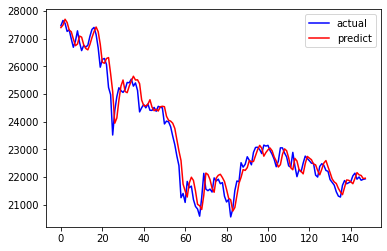

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)

model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
# print(y_pred)
print("R-sqrt = ", r2)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
# print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test, color='b')
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
hsi_4y_realplot_X = range(len(X_test))
hsi_4y_realplot_y = y_test
hsi_4y_linear_predict_plot = y_pred


In [80]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5405405405405406


array([[54, 32],
       [36, 26]], dtype=int64)

In [81]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(984, 1)
(984, 1)


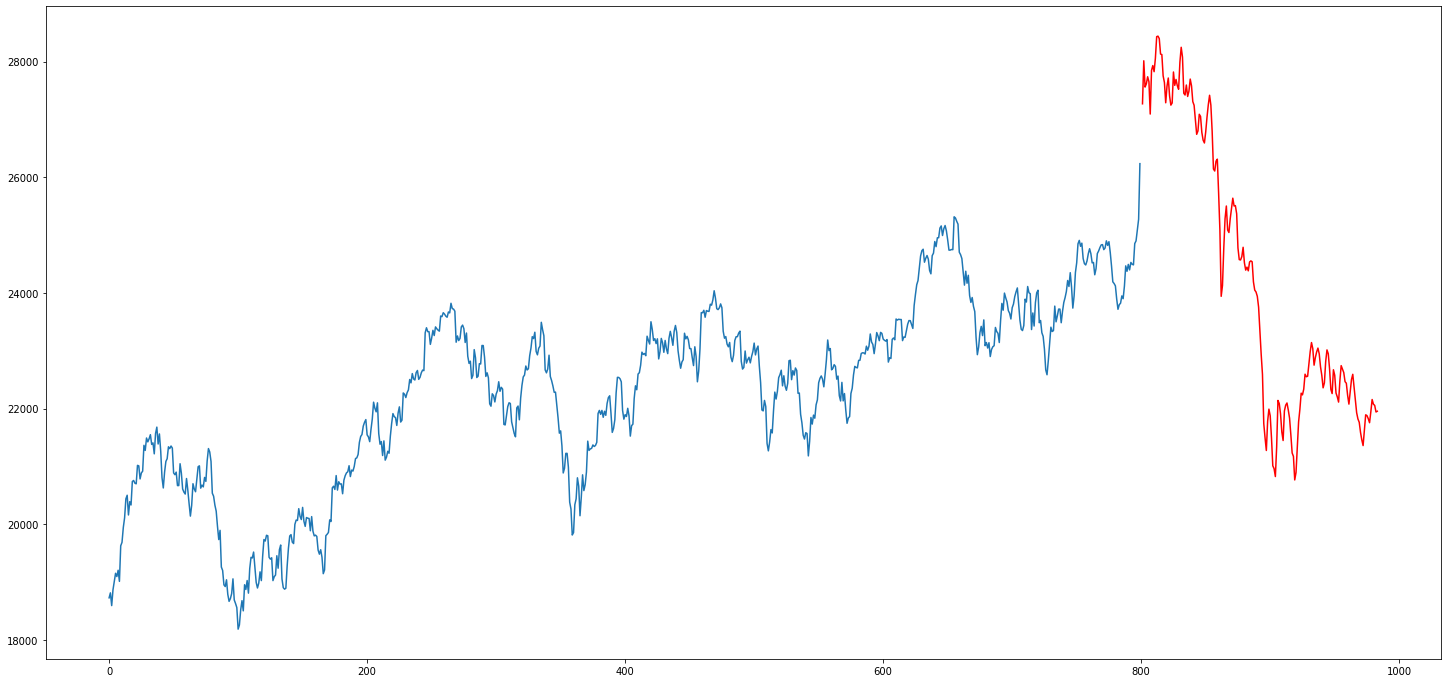

In [82]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:800])
plt.plot(new_predict[801:], color='r')

## Linear Regression HSI_7Y

In [83]:
open = HSI_7y['Open']
close = HSI_7y['Close']
high = HSI_7y['High']
low = HSI_7y['Low']
Adjclose = HSI_7y['Adj Close']
volume = HSI_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
HSI_7y['SMA5'] = pd.DataFrame(SMA5)
HSI_7y['SMA10'] = pd.DataFrame(SMA10)
HSI_7y['SMA14'] = pd.DataFrame(SMA14)
HSI_7y['SMA30'] = pd.DataFrame(SMA30)
HSI_7y['EMA5'] = pd.DataFrame(EMA5)
HSI_7y['EMA10'] = pd.DataFrame(EMA10)
HSI_7y['EMA14'] = pd.DataFrame(EMA14)
HSI_7y['EMA30'] = pd.DataFrame(EMA30)
HSI_7y['MOM5'] = pd.DataFrame(MOM5)
HSI_7y['MOM10'] = pd.DataFrame(MOM10)
HSI_7y['MOM14'] = pd.DataFrame(MOM14)
HSI_7y['RSI14'] = pd.DataFrame(RSI14)
HSI_7y['RSI28'] = pd.DataFrame(RSI28)
HSI_7y['WILLR14'] = pd.DataFrame(WILLR14)
HSI_7y['WILLR28'] = pd.DataFrame(WILLR28)
HSI_7y['AD'] = pd.DataFrame(AD)
HSI_7y['CCI14'] = pd.DataFrame(CCI14)
HSI_7y['CCI28'] = pd.DataFrame(CCI28)
HSI_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
HSI_7y['MACD'] = pd.DataFrame(MACD)
HSI_7y['macdhist'] = pd.DataFrame(macdhist)
HSI_7y['STOCHK'] = pd.DataFrame(STOCHK)
HSI_7y['STOCHD'] = pd.DataFrame(STOCHD)
hsi_cor7y = HSI_7y

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = hsi_cor7y
y = hsi_cor7y['Close'].shift(-1)
y.fillna(hsi_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0      1      2      3      4      5     6     7      8      9   ...  \
0     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
1     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
2     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
3     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
4    -1.635 -0.000 -0.000 -0.000 -1.637 -0.000 0.000 0.000  0.000  0.000  ...   
...     ...    ...    ...    ...    ...    ...   ...   ...    ...    ...  ...   
1716  0.625  0.664  0.724  0.743  0.625  0.671 0.694 0.730 -0.617 -0.428  ...   
1717  0.597  0.661  0.687  0.743  0.606  0.653 0.678 0.721 -0.780 -0.172  ...   
1718  0.575  0.652  0.656  0.740  0.575  0.628 0.656 0.708 -0.607 -0.407  ...   
1719  0.552  0.630  0.641  0.738  0.557  0.609 0.639 0.697 -0.651 -0.884  ...   
1720  0.566  0.608  0.636  0.735  0.582  0.613 0.638 0.693  0.345 -0.879  ...   

         13     14     15  

In [85]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True False  True False False False False False
 False False False False False False False False False False False]
[ 1  1  1  5  1  2  1  4 19  9  8 15 12 13 18 10 14 17  7  6  3 11 16]


In [86]:
mod_X = final_X.iloc[:, [0,1,2,4,6]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1462, 5)

[28865.27502605 28984.59753758 29117.29849693 29081.10542999
 28863.54332779 28975.31053227 29112.88493989 29280.96785387
 29453.65488311 29559.80359345 29613.59588091 29797.96120375
 29856.63369246 30262.77550169 30489.5291317  30612.69833562
 30705.76953153 30699.82036284 30848.27071636 30927.03268762
 30998.74437577 31205.03812178 31226.6124297  31608.55305647
 31799.22195764 31906.68535239 32032.48650635 32072.68149127
 32541.30258279 32753.61471637 32592.67452423 32795.45991217
 32717.1449139  32546.4265326  32661.54708764 32449.61575672
 32466.8365481  32244.59270501 30919.39503083 30246.76184674
 30147.04688411 29743.88295656 29769.22987591 29787.38093207
 30285.32390647 31117.14607364 31065.1271952  31226.89446593
 30926.15278704 31069.81183463 31491.65571789 31454.86453441
 31239.16558537 31096.53919145 30795.38559751 30251.65208712
 30414.98272525 30243.05352305 30628.81449156 31018.19673638
 31345.8287421  31620.58350052 31391.41871035 31346.40827021
 31316.60720859 31461.91

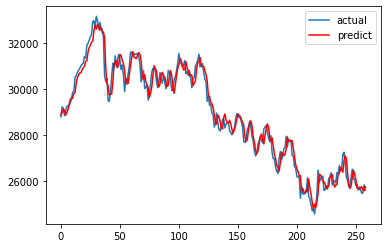

In [87]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
hsi_7y_realplot_X = range(len(X_test))
hsi_7y_realplot_y = y_test
hsi_7y_linear_predict_plot = y_pred

In [88]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.528957528957529


array([[68, 53],
       [69, 69]], dtype=int64)

In [89]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(1721, 1)
(1721, 1)


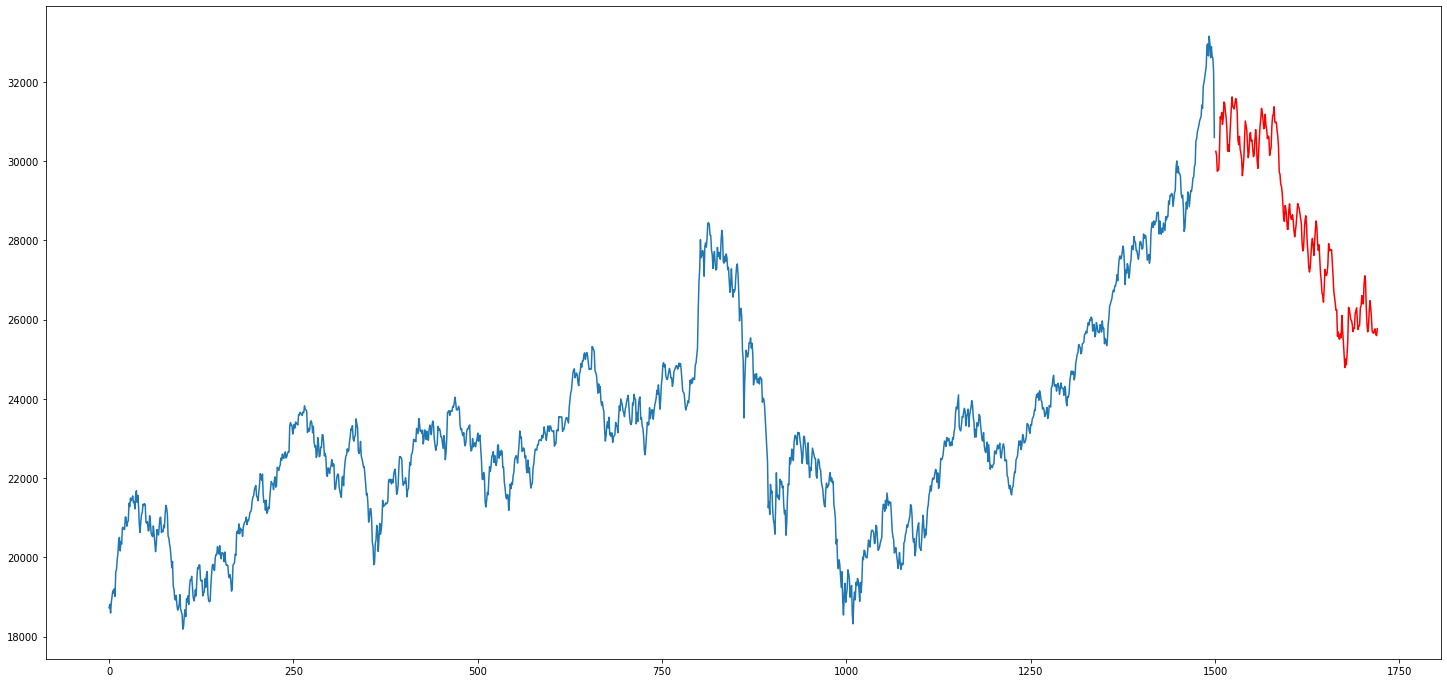

In [90]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## Linear Regression SSE_4Y

In [91]:
open = SSE_4y['Open']
close = SSE_4y['Close']
high = SSE_4y['High']
low = SSE_4y['Low']
Adjclose = SSE_4y['Adj Close']
volume = SSE_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
SSE_4y['SMA5'] = pd.DataFrame(SMA5)
SSE_4y['SMA10'] = pd.DataFrame(SMA10)
SSE_4y['SMA14'] = pd.DataFrame(SMA14)
SSE_4y['SMA30'] = pd.DataFrame(SMA30)
SSE_4y['EMA5'] = pd.DataFrame(EMA5)
SSE_4y['EMA10'] = pd.DataFrame(EMA10)
SSE_4y['EMA14'] = pd.DataFrame(EMA14)
SSE_4y['EMA30'] = pd.DataFrame(EMA30)
SSE_4y['MOM5'] = pd.DataFrame(MOM5)
SSE_4y['MOM10'] = pd.DataFrame(MOM10)
SSE_4y['MOM14'] = pd.DataFrame(MOM14)
SSE_4y['RSI14'] = pd.DataFrame(RSI14)
SSE_4y['RSI28'] = pd.DataFrame(RSI28)
SSE_4y['WILLR14'] = pd.DataFrame(WILLR14)
SSE_4y['WILLR28'] = pd.DataFrame(WILLR28)
SSE_4y['AD'] = pd.DataFrame(AD)
SSE_4y['CCI14'] = pd.DataFrame(CCI14)
SSE_4y['CCI28'] = pd.DataFrame(CCI28)
SSE_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
SSE_4y['MACD'] = pd.DataFrame(MACD)
SSE_4y['macdhist'] = pd.DataFrame(macdhist)
SSE_4y['STOCHK'] = pd.DataFrame(STOCHK)
SSE_4y['STOCHD'] = pd.DataFrame(STOCHD)
sse_cor4y = SSE_4y

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = sse_cor4y
y = sse_cor4y['Close'].shift(-1)
y.fillna(sse_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

        0     1     2     3      4     5      6     7      8      9   ...  \
0    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
1    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
2    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
3    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
4   -0.546 0.000 0.000 0.000 -0.547 0.000 -0.000 0.000  0.000  0.000  ...   
..     ...   ...   ...   ...    ...   ...    ...   ...    ...    ...  ...   
964  1.440 1.385 1.342 1.386  1.419 1.398  1.389 1.383  0.338  0.964  ...   
965  1.410 1.387 1.348 1.382  1.380 1.383  1.380 1.382 -0.932 -0.006  ...   
966  1.385 1.394 1.357 1.380  1.368 1.378  1.378 1.384 -0.766  0.211  ...   
967  1.368 1.402 1.369 1.380  1.364 1.376  1.378 1.386 -0.566  0.228  ...   
968  1.347 1.397 1.379 1.377  1.346 1.366  1.372 1.385 -0.647 -0.296  ...   

        13    14     15     16     17    18    19     20     21     22  
0 

In [93]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True  True False False False False False False
 False False False False False False False False False False False]
[ 1  1  1 12  1  1  3  8  2  4 10 18 14 15 16  7  6 17 19 13  9  5 11]


In [94]:
mod_X = final_X.iloc[:, [0,1,2,4,5]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(823, 5)

[4705.41587759 4858.28058916 4960.99288993 4947.61409689 4950.8470776
 5058.53941015 5112.49235719 5120.19759412 5101.64348036 5116.33816974
 5080.51523238 4938.26682616 4911.60259094 4786.25939971 4551.32820403
 4518.62540582 4579.1048023  4564.87530295 4328.26774619 4062.01264413
 4131.08133935 4099.67900948 4023.36586828 3787.24093829 3700.09589522
 3732.09354122 3620.4464014  3710.56868769 3826.65988949 3979.21725215
 4039.35125136 3899.74815564 3843.26723944 3923.79787449 4029.84605342
 4091.16486793 4065.33889955 4095.45041368 4094.67189921 3856.63773582
 3684.19222638 3691.98138917 3699.77895113 3716.54065307 3638.94571364
 3676.36567847 3696.80998568 3688.45812228 3739.13015679 3862.62618251
 3950.07405275 3950.01905982 3959.24275335 3954.83177755 3996.18151376
 3851.66749229 3784.03182236 3673.99408751 3529.18404831 3303.34760843
 2998.42418323 2879.42858894 2982.06297841 3188.5701948  3263.76805353
 3210.83015669 3158.41449725 3103.60360526 3183.54745287 3270.68329967
 3267.4

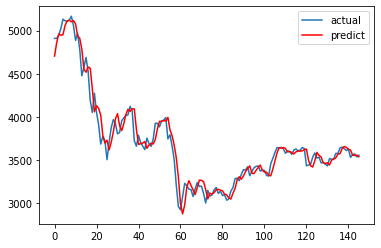

In [95]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
sse_4y_realplot_X = range(len(X_test))
sse_4y_realplot_y = y_test
sse_4y_linear_predict_plot = y_pred

In [96]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.4246575342465753


array([[31, 39],
       [45, 31]], dtype=int64)

In [97]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(969, 1)
(969, 1)


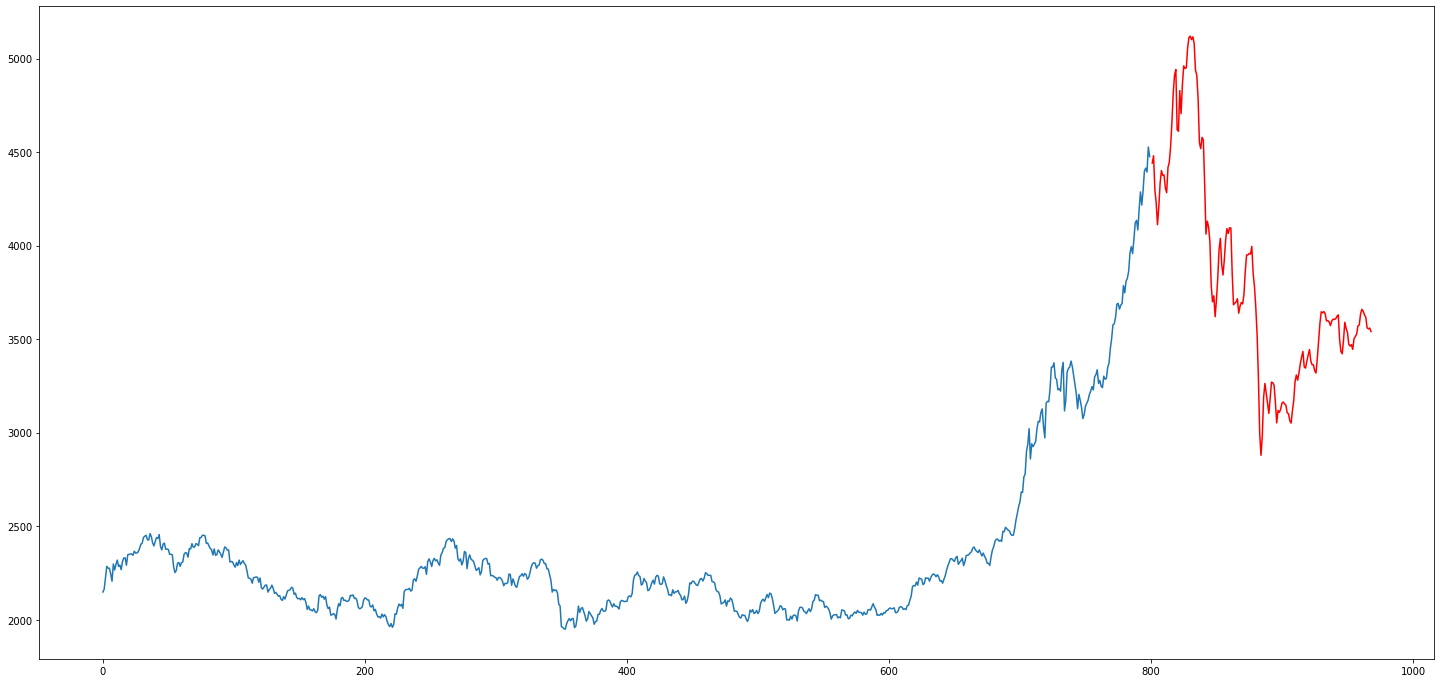

In [98]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:800])
plt.plot(new_predict[801:], color='r')

## Linear Regression SSE_7Y

In [99]:
open = SSE_7y['Open']
close = SSE_7y['Close']
high = SSE_7y['High']
low = SSE_7y['Low']
volume = SSE_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
SSE_7y['SMA5'] = pd.DataFrame(SMA5)
SSE_7y['SMA10'] = pd.DataFrame(SMA10)
SSE_7y['SMA14'] = pd.DataFrame(SMA14)
SSE_7y['SMA30'] = pd.DataFrame(SMA30)
SSE_7y['EMA5'] = pd.DataFrame(EMA5)
SSE_7y['EMA10'] = pd.DataFrame(EMA10)
SSE_7y['EMA14'] = pd.DataFrame(EMA14)
SSE_7y['EMA30'] = pd.DataFrame(EMA30)
SSE_7y['MOM5'] = pd.DataFrame(MOM5)
SSE_7y['MOM10'] = pd.DataFrame(MOM10)
SSE_7y['MOM14'] = pd.DataFrame(MOM14)
SSE_7y['RSI14'] = pd.DataFrame(RSI14)
SSE_7y['RSI28'] = pd.DataFrame(RSI28)
SSE_7y['WILLR14'] = pd.DataFrame(WILLR14)
SSE_7y['WILLR28'] = pd.DataFrame(WILLR28)
SSE_7y['AD'] = pd.DataFrame(AD)
SSE_7y['CCI14'] = pd.DataFrame(CCI14)
SSE_7y['CCI28'] = pd.DataFrame(CCI28)
SSE_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
SSE_7y['MACD'] = pd.DataFrame(MACD)
SSE_7y['macdhist'] = pd.DataFrame(macdhist)
SSE_7y['STOCHK'] = pd.DataFrame(STOCHK)
SSE_7y['STOCHD'] = pd.DataFrame(STOCHD)
sse_cor7y = SSE_7y

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = sse_cor7y
y = sse_cor7y['Close'].shift(-1)
X = X.drop(X.iloc[:,0:6], axis=1)
y.fillna(sse_cor7y['Close'][-3:].mean(), inplace=True)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0      1      2      3      4      5      6      7      8      9   \
0     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
1     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
2     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
3     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
4    -0.977  0.000  0.000  0.000 -0.978  0.000  0.000 -0.000 -0.000 -0.000   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1695 -0.419 -0.371 -0.355 -0.324 -0.419 -0.389 -0.374 -0.346 -0.675 -0.376   
1696 -0.442 -0.385 -0.372 -0.332 -0.439 -0.406 -0.389 -0.356 -0.683 -0.577   
1697 -0.459 -0.402 -0.385 -0.339 -0.456 -0.422 -0.404 -0.366 -0.490 -0.669   
1698 -0.477 -0.427 -0.399 -0.350 -0.475 -0.440 -0.419 -0.377 -0.508 -0.968   
1699 -0.484 -0.443 -0.410 -0.360 -0.482 -0.451 -0.431 -0.386 -0.218 -0.644   

      ...     13     14     15     16     17     18     19     

In [101]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True  True False False False False False False
 False False False False False False False False False False False]
[ 1  1  1  9  1  1  2  7  4  3 17 15 14  6 13 16 18 12 19 10 11  5  8]


In [102]:
mod_X = final_X.iloc[:, [0,1,2,4,5]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1445, 5)

[3294.79241743 3272.90471837 3273.36933838 3285.89663113 3293.22430025
 3303.37573201 3299.26623844 3284.91956605 3298.28684182 3283.29524243
 3292.63213468 3304.26486108 3332.26387659 3367.37211044 3383.26034034
 3391.48719247 3400.12088782 3408.35703653 3417.8552974  3421.68777787
 3422.32501878 3409.20992763 3420.1993424  3431.93720759 3458.48319077
 3479.49822186 3490.01332473 3525.33710807 3546.8416663  3548.71021605
 3550.81584897 3520.81791901 3488.55559293 3471.45505804 3442.50410359
 3448.04589277 3469.24788598 3399.57538246 3325.84128484 3255.62070337
 3150.06912188 3147.07946756 3169.27386556 3200.33377772 3269.84397021
 3292.01635392 3332.32284912 3321.60818982 3283.04342526 3282.18467367
 3266.02457786 3271.55150708 3291.949755   3280.64877778 3288.54549709
 3299.33193281 3317.6615568  3319.35544787 3297.49266276 3286.59639853
 3269.65880355 3274.33327107 3286.12117973 3282.02847059 3268.88976819
 3182.10692745 3131.24287836 3141.28236509 3129.95470166 3163.78058105
 3168.

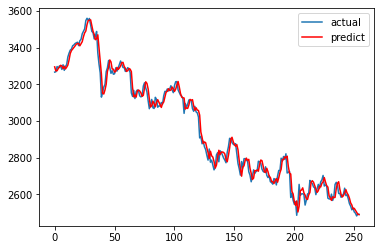

In [103]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
sse_7y_realplot_X = range(len(X_test))
sse_7y_realplot_y = y_test
sse_7y_linear_predict_plot = y_pred

In [104]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5450980392156862


array([[77, 58],
       [58, 62]], dtype=int64)

In [105]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))
print(actual.shape)
print(new_predict.shape)


(1700, 1)
(1700, 1)


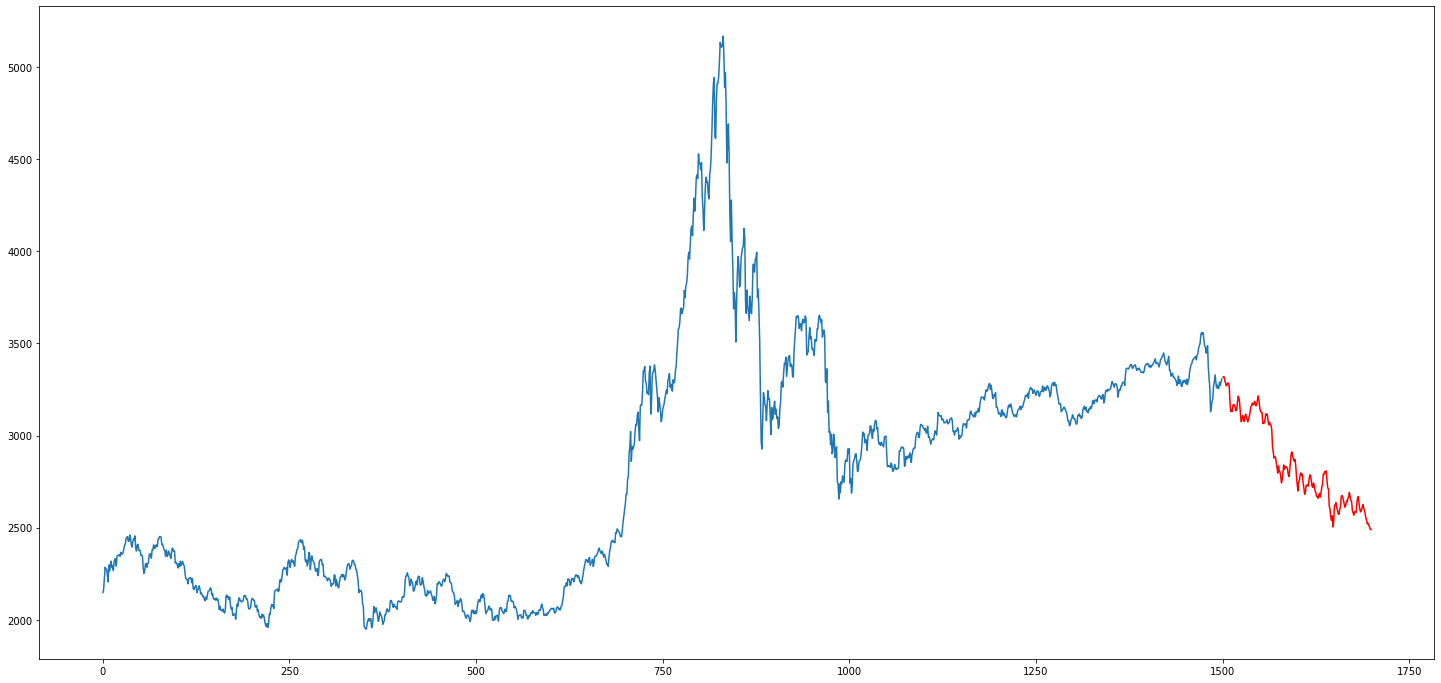

In [106]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## Linear Regression DJI_4Y

In [107]:
open = DJI_4y['Open']
close = DJI_4y['Close']
high = DJI_4y['High']
low = DJI_4y['Low']
Adjclose = DJI_4y['Adj Close']
volume = DJI_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
DJI_4y['SMA5'] = pd.DataFrame(SMA5)
DJI_4y['SMA10'] = pd.DataFrame(SMA10)
DJI_4y['SMA14'] = pd.DataFrame(SMA14)
DJI_4y['SMA30'] = pd.DataFrame(SMA30)
DJI_4y['EMA5'] = pd.DataFrame(EMA5)
DJI_4y['EMA10'] = pd.DataFrame(EMA10)
DJI_4y['EMA14'] = pd.DataFrame(EMA14)
DJI_4y['EMA30'] = pd.DataFrame(EMA30)
DJI_4y['MOM5'] = pd.DataFrame(MOM5)
DJI_4y['MOM10'] = pd.DataFrame(MOM10)
DJI_4y['MOM14'] = pd.DataFrame(MOM14)
DJI_4y['RSI14'] = pd.DataFrame(RSI14)
DJI_4y['RSI28'] = pd.DataFrame(RSI28)
DJI_4y['WILLR14'] = pd.DataFrame(WILLR14)
DJI_4y['WILLR28'] = pd.DataFrame(WILLR28)
DJI_4y['AD'] = pd.DataFrame(AD)
DJI_4y['CCI14'] = pd.DataFrame(CCI14)
DJI_4y['CCI28'] = pd.DataFrame(CCI28)
DJI_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
DJI_4y['MACD'] = pd.DataFrame(MACD)
DJI_4y['macdhist'] = pd.DataFrame(macdhist)
DJI_4y['STOCHK'] = pd.DataFrame(STOCHK)
DJI_4y['STOCHD'] = pd.DataFrame(STOCHD)
dji_cor4y = DJI_4y

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = dji_cor4y
y = dji_cor4y['Close'].shift(-1)
X = X.drop(X.iloc[:,0:6], axis=1)
y.fillna(dji_cor4y['Close'][-3:].mean(), inplace=True)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0     1      2     3      4     5      6      7      8      9   ...  \
0     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
1     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
2     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
3     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
4    -1.729 0.000 -0.000 0.000 -1.730 0.000 -0.000 -0.000  0.000  0.000  ...   
...     ...   ...    ...   ...    ...   ...    ...    ...    ...    ...  ...   
1001  0.973 1.002  1.030 1.105  1.024 1.029  1.043  1.074  0.117 -0.211  ...   
1002  1.016 1.017  1.022 1.107  1.032 1.033  1.045  1.074  1.429  0.611  ...   
1003  1.067 1.036  1.028 1.116  1.072 1.056  1.061  1.081  1.695  0.868  ...   
1004  1.087 1.040  1.033 1.118  1.078 1.063  1.066  1.083  0.614  0.081  ...   
1005  1.068 1.022  1.027 1.117  1.049 1.051  1.058  1.079 -0.777 -1.078  ...   

         13     14     15     16     17

In [109]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True False False  True  True False  True False False False False
 False False False False False False False False False False False]
[ 1  1  6  2  1  1  9  1 18  7  4 10  8 17 16  3 11 15 14 19  5 13 12]


In [110]:
mod_X = final_X.iloc[:, [0,1,4,5,7]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(855, 5)

[18037.64393394 18043.69116782 17994.22989024 18054.03203166
 17986.12320996 17897.98084141 17817.46240643 17773.58374285
 17959.83487519 18063.30312873 18002.58977882 17864.43067146
 17842.38694466 17920.28128696 18096.61934616 18087.40223012
 18086.92081629 18095.88123246 17985.5153897  17923.85728188
 17898.94813418 17687.95229647 17636.0257457  17693.57417181
 17731.98975056 17764.62561814 17774.71698729 17614.13456111
 17582.58324517 17712.44134326 17929.82654268 18094.41833909
 18078.24695081 18068.94491211 18040.76713248 18056.32807037
 17962.18348837 17839.37845734 17716.97473228 17571.85114978
 17473.96908156 17557.20423215 17709.19458417 17794.35032199
 17767.32421228 17646.43495639 17576.81030366 17574.62216073
 17512.72421251 17448.04531785 17552.58391537 17481.97143062
 17461.98074282 17434.11594931 17448.09786911 17567.89673075
 17561.08671457 17440.63495694 17129.8192366  16649.63435365
 16117.69934094 15809.11769861 16173.64505705 16676.28389365
 16893.31938842 16778.55

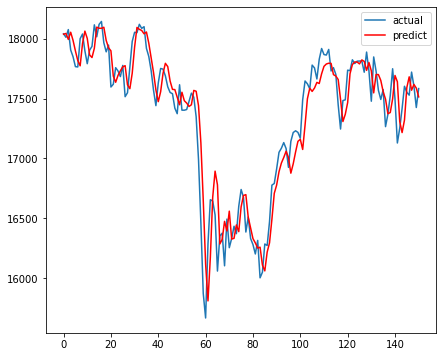

In [111]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'], loc='upper right')
plt.show()
dji_4y_realplot_X = range(len(X_test))
dji_4y_realplot_y = y_test
dji_4y_linear_predict_plot = y_pred

In [112]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.45695364238410596


array([[39, 41],
       [41, 30]], dtype=int64)

In [113]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(1006, 1)
(1006, 1)


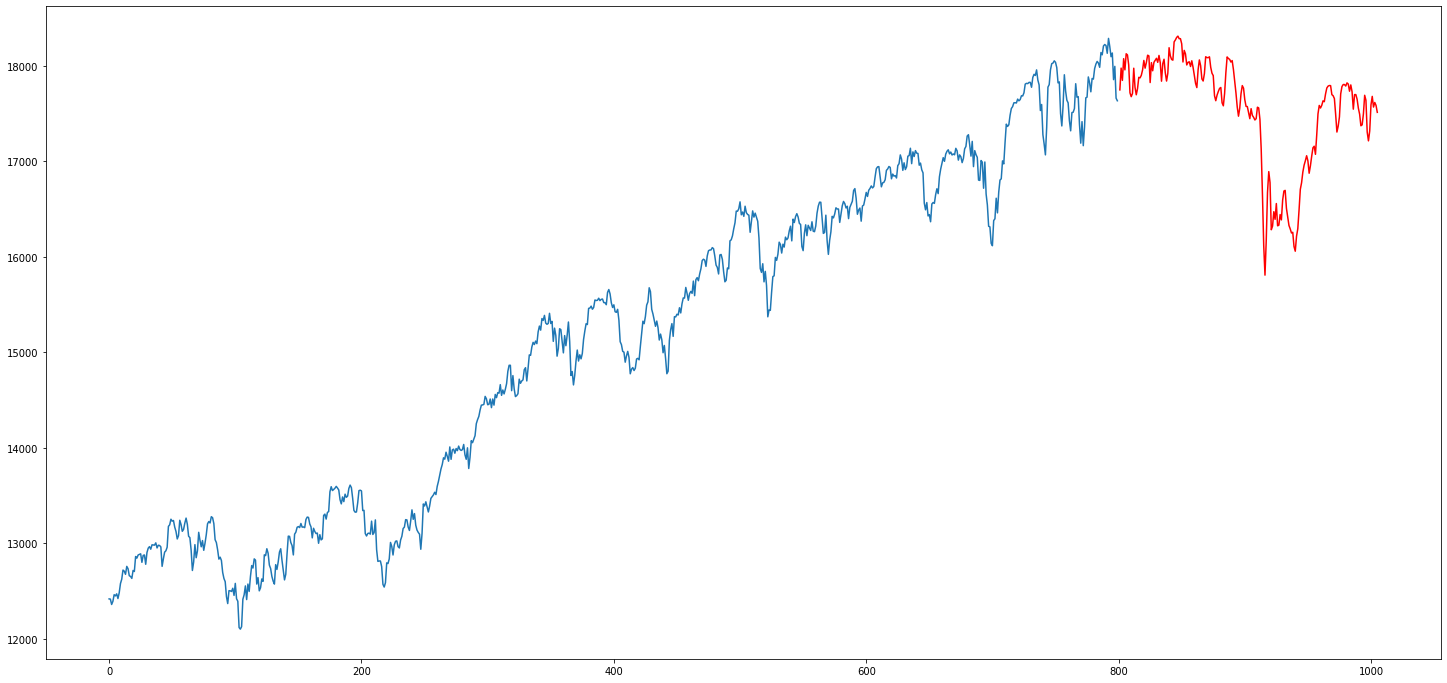

In [114]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:800])
plt.plot(new_predict[801:], color='r')

## Linear Regression DJI_7Y

In [115]:
open = DJI_7y['Open']
close = DJI_7y['Close']
high = DJI_7y['High']
low = DJI_7y['Low']
Adjclose = DJI_7y['Adj Close']
volume = DJI_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
DJI_7y['SMA5'] = pd.DataFrame(SMA5)
DJI_7y['SMA10'] = pd.DataFrame(SMA10)
DJI_7y['SMA14'] = pd.DataFrame(SMA14)
DJI_7y['SMA30'] = pd.DataFrame(SMA30)
DJI_7y['EMA5'] = pd.DataFrame(EMA5)
DJI_7y['EMA10'] = pd.DataFrame(EMA10)
DJI_7y['EMA14'] = pd.DataFrame(EMA14)
DJI_7y['EMA30'] = pd.DataFrame(EMA30)
DJI_7y['MOM5'] = pd.DataFrame(MOM5)
DJI_7y['MOM10'] = pd.DataFrame(MOM10)
DJI_7y['MOM14'] = pd.DataFrame(MOM14)
DJI_7y['RSI14'] = pd.DataFrame(RSI14)
DJI_7y['RSI28'] = pd.DataFrame(RSI28)
DJI_7y['WILLR14'] = pd.DataFrame(WILLR14)
DJI_7y['WILLR28'] = pd.DataFrame(WILLR28)
DJI_7y['AD'] = pd.DataFrame(AD)
DJI_7y['CCI14'] = pd.DataFrame(CCI14)
DJI_7y['CCI28'] = pd.DataFrame(CCI28)
DJI_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
DJI_7y['MACD'] = pd.DataFrame(MACD)
DJI_7y['macdhist'] = pd.DataFrame(macdhist)
DJI_7y['STOCHK'] = pd.DataFrame(STOCHK)
DJI_7y['STOCHD'] = pd.DataFrame(STOCHD)
dji_cor7y = DJI_7y

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = dji_cor7y
y = dji_cor7y['Close'].shift(-1)
y.fillna(dji_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0     1     2     3      4     5     6     7      8      9   ...  \
0     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
1     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
2     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
3     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
4    -1.498 0.000 0.000 0.000 -1.499 0.000 0.000 0.000  0.000  0.000  ...   
...     ...   ...   ...   ...    ...   ...   ...   ...    ...    ...  ...   
1755  1.214 1.403 1.494 1.693  1.179 1.342 1.429 1.628 -5.491 -5.965  ...   
1756  1.173 1.364 1.454 1.666  1.196 1.323 1.403 1.604 -2.480 -3.440  ...   
1757  1.163 1.328 1.420 1.646  1.230 1.319 1.390 1.586 -0.644 -3.211  ...   
1758  1.174 1.288 1.395 1.626  1.246 1.312 1.376 1.568  0.519 -3.536  ...   
1759  1.220 1.268 1.375 1.611  1.280 1.320 1.374 1.555  2.557 -1.847  ...   

         13     14     15     16     17     18     19     20     21     22 

In [117]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
model = LinearRegression(fit_intercept=True)
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True  True  True False  True False  True False False False False False
 False False False False False False False False False False False]
[ 1  1  1 11  1  2  1  5  8  6 14 16 17 10 18  3 15  9  4  7 13 19 12]


In [118]:
mod_X = final_X.iloc[:, [0,1,2,4,6]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1496, 5)

[24465.37243194 24511.51014195 24450.77595697 24501.60541762
 24612.62722911 24652.58456759 24672.81276545 24668.52853819
 24667.58735262 24693.25721097 24710.57200345 24746.48344577
 24698.74860932 24731.88594784 24810.58084902 24954.82275946
 25176.41300347 25211.86850336 25276.89624142 25269.66989031
 25397.84371444 25655.89305246 25739.75088405 25974.85831708
 25953.4175054  25962.73981127 26069.14496901 26067.67864705
 26157.57564312 26246.8005933  26427.2912243  26402.00643408
 26103.86192032 25973.68730581 25981.03791833 25664.60615562
 24738.49894375 24648.99456944 24762.05662286 24343.45699985
 24349.10959639 24350.77647172 24596.81795935 24993.96753599
 25094.11520143 25149.69772943 25047.44619477 24863.15769302
 24957.00394807 25343.1491682  25793.19479314 25749.01501518
 25332.22848408 24734.31529813 24468.79341168 24787.38946612
 24990.20457768 24995.76504436 24942.25927711 25141.4503288
 25189.49360284 25058.27699791 24760.02964615 24701.75170115
 24924.47707652 24835.212

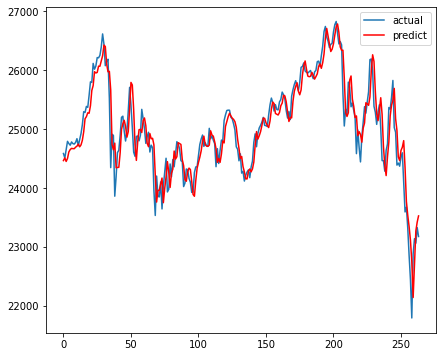

In [119]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = LinearRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
dji_7y_realplot_X = range(len(X_test))
dji_7y_realplot_y = y_test
dji_7y_linear_predict_plot = y_pred

In [120]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5643939393939394


array([[67, 58],
       [57, 82]], dtype=int64)

In [121]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))

(1760, 1)
(1760, 1)


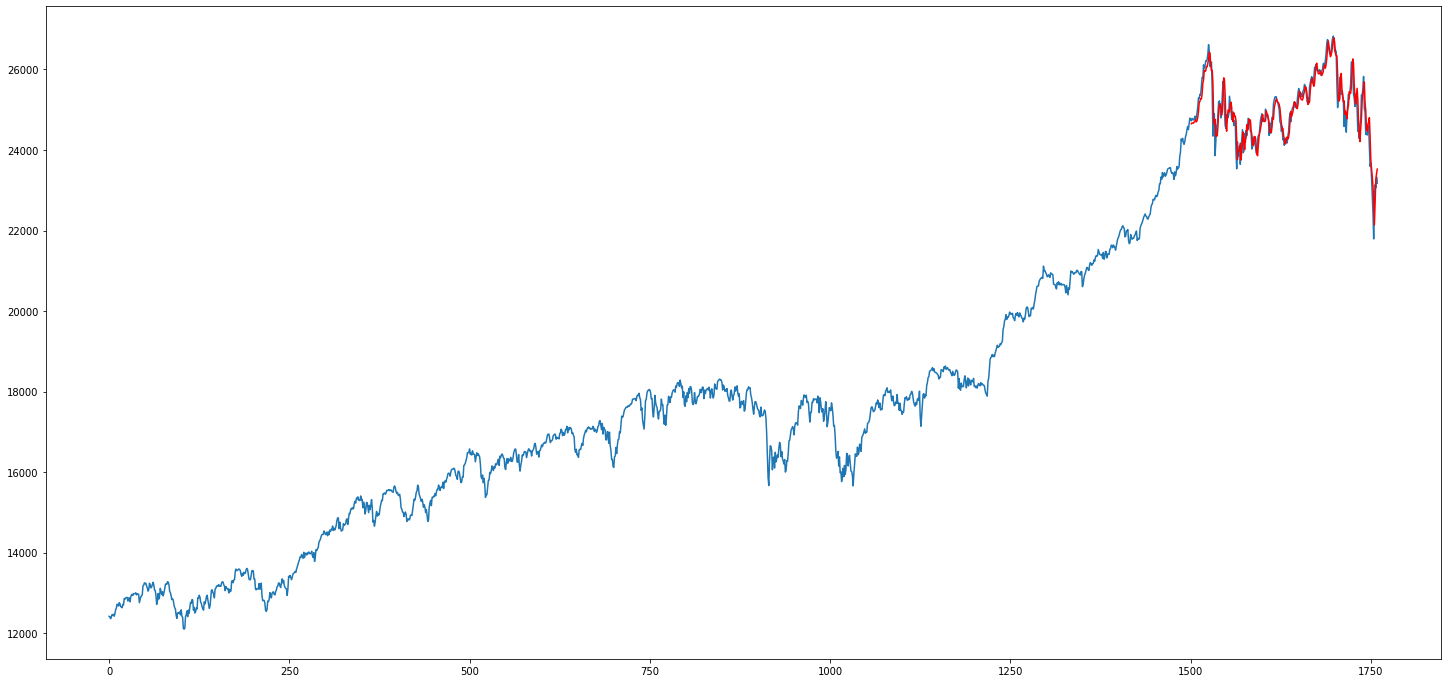

In [122]:
plt.figure(figsize=(25,12))
plt.plot(actual)
plt.plot(new_predict[1501:], color='r')

## -------------------------------------------------------------------------------------------------------------------------

## ARD Regression N225_4Y

In [3]:
open = N225_4y['Open']
close = N225_4y['Close']
high = N225_4y['High']
low = N225_4y['Low']
Adjclose = N225_4y['Adj Close']
volume = N225_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
N225_4y['SMA5'] = pd.DataFrame(SMA5)
N225_4y['SMA10'] = pd.DataFrame(SMA10)
N225_4y['SMA14'] = pd.DataFrame(SMA14)
N225_4y['SMA30'] = pd.DataFrame(SMA30)
N225_4y['EMA5'] = pd.DataFrame(EMA5)
N225_4y['EMA10'] = pd.DataFrame(EMA10)
N225_4y['EMA14'] = pd.DataFrame(EMA14)
N225_4y['EMA30'] = pd.DataFrame(EMA30)
N225_4y['MOM5'] = pd.DataFrame(MOM5)
N225_4y['MOM10'] = pd.DataFrame(MOM10)
N225_4y['MOM14'] = pd.DataFrame(MOM14)
N225_4y['RSI14'] = pd.DataFrame(RSI14)
N225_4y['RSI28'] = pd.DataFrame(RSI28)
N225_4y['WILLR14'] = pd.DataFrame(WILLR14)
N225_4y['WILLR28'] = pd.DataFrame(WILLR28)
N225_4y['AD'] = pd.DataFrame(AD)
N225_4y['CCI14'] = pd.DataFrame(CCI14)
N225_4y['CCI28'] = pd.DataFrame(CCI28)
N225_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
N225_4y['MACD'] = pd.DataFrame(MACD)
N225_4y['macdhist'] = pd.DataFrame(macdhist)
N225_4y['STOCHK'] = pd.DataFrame(STOCHK)
N225_4y['STOCHD'] = pd.DataFrame(STOCHD)
n225_cor4y = N225_4y



                 High        Low       Open      Close     Volume  Adj Close  \
Date                                                                           
2012-01-04  8,581.450  8,547.700  8,549.540  8,560.110  106000000  8,560.110   
2012-01-05  8,519.160  8,481.830  8,515.660  8,488.710   77700000  8,488.710   
2012-01-06  8,488.980  8,349.330  8,488.980  8,390.350  101300000  8,390.350   
2012-01-10  8,450.590  8,405.180  8,422.990  8,422.260  112300000  8,422.260   
2012-01-11  8,463.720  8,426.030  8,440.960  8,447.880  106200000  8,447.880   
...               ...        ...        ...        ...        ...        ...   
2015-12-24 19,071.410 18,780.939 19,071.410 18,789.689  129500000 18,789.689   
2015-12-25 18,870.699 18,744.439 18,823.910 18,769.061  122600000 18,769.061   
2015-12-28 18,922.900 18,764.539 18,838.910 18,873.350  102300000 18,873.350   
2015-12-29 18,991.010 18,783.359 18,843.391 18,982.230   96900000 18,982.230   
2015-12-30 19,113.180 19,017.270 19,070.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = n225_cor4y
y = n225_cor4y['Close'].shift(-1)
y.fillna(n225_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

In [5]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
from sklearn.svm import SVR
model = ARDRegression(n_iter=370, compute_score=True, fit_intercept=True, normalize=True)
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)


5
[ True  True False False  True  True  True False False False False False
 False False False False False False False False False False False]
[ 1  1  2  8  1  1  1  4  3  5 15 13 14 17 18  9 11 19 16 10 12  6  7]
(981, 5)


In [6]:
mod_X = final_X.iloc[:, [0,1,4,5,6]].values
mod_y = y.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(833, 5)

[20326.53387161 20398.27198621 20457.47206134 20500.94784108
 20530.01874067 20537.15942105 20543.56194528 20542.21506068
 20537.82803413 20460.59983612 20389.73563713 20397.52490377
 20406.86698203 20408.2662832  20399.09945972 20388.99830961
 20319.00088044 20297.27405093 20329.83372983 20444.2883278
 20553.07087171 20631.1596344  20678.25994401 20587.23828262
 20525.25850654 20489.36083387 20504.51207957 20518.21238757
 20464.9783515  20466.7409444  20330.91710928 20234.95118693
 20135.8749391  20142.87830039 20192.20911223 20274.23961401
 20363.26619004 20452.5077593  20561.14414943 20584.4611935
 20631.25856629 20636.01032842 20601.31115255 20556.20598086
 20519.79724125 20528.45509968 20550.23496989 20567.75430214
 20575.10416514 20606.36482686 20631.6323827  20663.67760486
 20712.3319789  20737.40298931 20689.04351107 20687.21607286
 20665.76433473 20664.32802614 20652.35456377 20588.04359347
 20487.41853037 20283.30795979 19923.20205445 19474.97948143
 19234.38841977 19067.9427

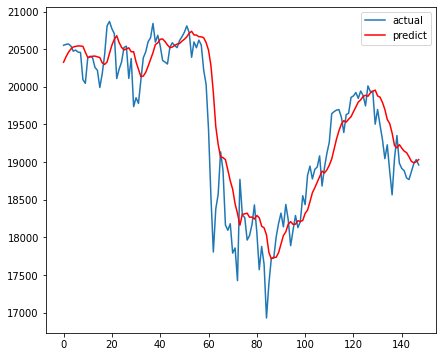

In [8]:

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(n_iter=370, compute_score=True, fit_intercept=True, normalize=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
# print("Model Coefficients:", model.coef_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.figure(figsize=(7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
n225_4y_ard_predict_plot = y_pred

In [9]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5135135135135135


array([[33, 37],
       [35, 43]], dtype=int64)

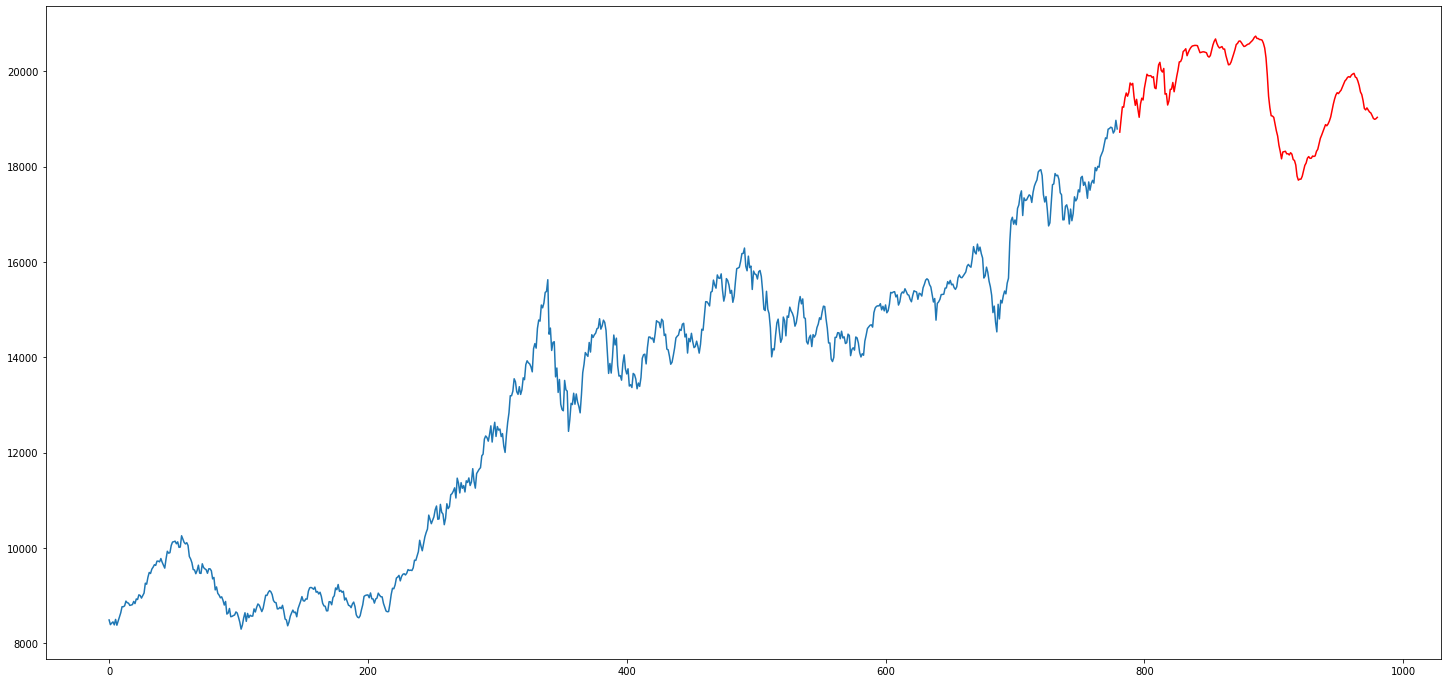

In [10]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))
plt.figure(figsize=(25,12))
plt.plot(actual[0:780])
plt.plot(new_predict[781:], color='r')

## ARD Regression N225_7Y

In [133]:
open = N225_7y['Open']
close = N225_7y['Close']
high = N225_7y['High']
low = N225_7y['Low']
Adjclose = N225_7y['Adj Close']
volume = N225_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
N225_7y['SMA5'] = pd.DataFrame(SMA5)
N225_7y['SMA10'] = pd.DataFrame(SMA10)
N225_7y['SMA14'] = pd.DataFrame(SMA14)
N225_7y['SMA30'] = pd.DataFrame(SMA30)
N225_7y['EMA5'] = pd.DataFrame(EMA5)
N225_7y['EMA10'] = pd.DataFrame(EMA10)
N225_7y['EMA14'] = pd.DataFrame(EMA14)
N225_7y['EMA30'] = pd.DataFrame(EMA30)
N225_7y['MOM5'] = pd.DataFrame(MOM5)
N225_7y['MOM10'] = pd.DataFrame(MOM10)
N225_7y['MOM14'] = pd.DataFrame(MOM14)
N225_7y['RSI14'] = pd.DataFrame(RSI14)
N225_7y['RSI28'] = pd.DataFrame(RSI28)
N225_7y['WILLR14'] = pd.DataFrame(WILLR14)
N225_7y['WILLR28'] = pd.DataFrame(WILLR28)
N225_7y['AD'] = pd.DataFrame(AD)
N225_7y['CCI14'] = pd.DataFrame(CCI14)
N225_7y['CCI28'] = pd.DataFrame(CCI28)
N225_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
N225_7y['MACD'] = pd.DataFrame(MACD)
N225_7y['macdhist'] = pd.DataFrame(macdhist)
N225_7y['STOCHK'] = pd.DataFrame(STOCHK)
N225_7y['STOCHD'] = pd.DataFrame(STOCHD)
n225_cor7y = N225_7y



                 High        Low       Open      Close          Volume  \
Date                                                                     
2012-01-04  8,581.450  8,547.700  8,549.540  8,560.110 106,000,000.000   
2012-01-05  8,519.160  8,481.830  8,515.660  8,488.710  77,700,000.000   
2012-01-06  8,488.980  8,349.330  8,488.980  8,390.350 101,300,000.000   
2012-01-10  8,450.590  8,405.180  8,422.990  8,422.260 112,300,000.000   
2012-01-11  8,463.720  8,426.030  8,440.960  8,447.880 106,200,000.000   
...               ...        ...        ...        ...             ...   
2018-12-21 20,334.730 20,006.670 20,310.500 20,166.189 116,600,000.000   
2018-12-25 19,785.430 19,117.961 19,785.430 19,155.740           0.000   
2018-12-26 19,530.350 18,948.580 19,302.590 19,327.061  79,900,000.000   
2018-12-27 20,211.570 19,701.760 19,706.189 20,077.619  93,000,000.000   
2018-12-28 20,084.381 19,900.039 19,957.881 20,014.770  70,600,000.000   

            Adj Close       SMA5     

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = n225_cor7y
y = n225_cor7y['Close'].shift(-1)
y.fillna(n225_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

In [135]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
from sklearn.svm import SVR
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)
print(X_rfe.shape)


5
[ True False False False  True False False False  True  True False False
 False False False  True False False False False False False False]
[ 1 15 19  8  1 16 18  2  1  1 11 13  9  4 12  1  5  7 14 17  3 10  6]
(1719, 5)


In [136]:
mod_X = final_X.iloc[:, [0,4,8,9,15]].values
mod_y = y.values

In [137]:
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1461, 5)

[22640.87480292 22466.16503772 22730.37120478 22820.16408429
 22941.8659811  22896.5708513  22857.18043497 22844.5761006
 22842.66716048 22870.43326991 22784.57414403 22754.65377262
 23268.50236417 23618.62554583 23835.3645474  23828.74610917
 23681.24327688 23533.61725788 23580.79615634 23812.34656496
 23878.80070832 23825.1518004  23735.17887783 23699.77667442
 23926.61746052 23898.15877305 23688.73386101 23571.51518862
 23505.4816526  23221.68866739 23058.92950843 23321.67475445
 23230.88842493 22782.92207361 21799.39464828 21493.40607761
 21622.89856511 21412.70939482 21331.84868253 21246.16530629
 21364.91886899 21552.55105233 22013.1240652  21998.13729083
 22073.17632021 21797.52739362 21782.43747319 22069.86288114
 22389.75596398 22254.53266681 21898.70362306 21299.2866559
 20958.92281171 21236.9573597  21276.90718193 21458.6395967
 21540.14220648 21735.43645723 21859.00502806 21808.83297161
 21801.78275052 21714.9789157  21530.1377427  21390.76660251
 21576.10641338 20884.26907

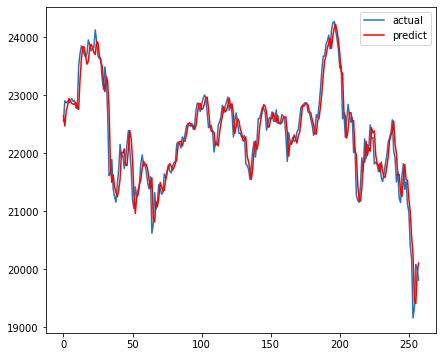

In [138]:

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression()
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
# print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.figure(figsize=(7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
n225_7y_ard_predict_plot = y_pred

In [139]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.49612403100775193


array([[62, 63],
       [67, 66]], dtype=int64)

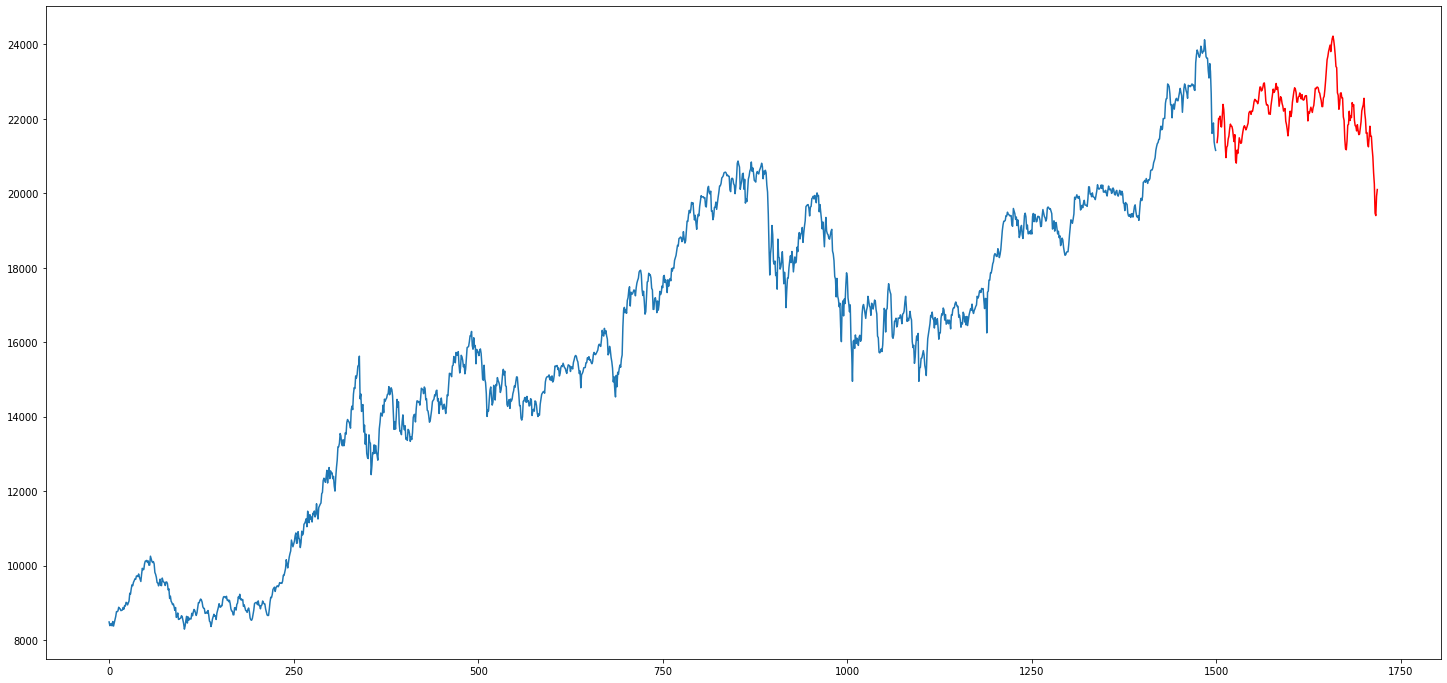

In [141]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## ARD Regression HSI_4Y

In [142]:
open = HSI_4y['Open']
close = HSI_4y['Close']
high = HSI_4y['High']
low = HSI_4y['Low']
Adjclose = HSI_4y['Adj Close']
volume = HSI_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
HSI_4y['SMA5'] = pd.DataFrame(SMA5)
HSI_4y['SMA10'] = pd.DataFrame(SMA10)
HSI_4y['SMA14'] = pd.DataFrame(SMA14)
HSI_4y['SMA30'] = pd.DataFrame(SMA30)
HSI_4y['EMA5'] = pd.DataFrame(EMA5)
HSI_4y['EMA10'] = pd.DataFrame(EMA10)
HSI_4y['EMA14'] = pd.DataFrame(EMA14)
HSI_4y['EMA30'] = pd.DataFrame(EMA30)
HSI_4y['MOM5'] = pd.DataFrame(MOM5)
HSI_4y['MOM10'] = pd.DataFrame(MOM10)
HSI_4y['MOM14'] = pd.DataFrame(MOM14)
HSI_4y['RSI14'] = pd.DataFrame(RSI14)
HSI_4y['RSI28'] = pd.DataFrame(RSI28)
HSI_4y['WILLR14'] = pd.DataFrame(WILLR14)
HSI_4y['WILLR28'] = pd.DataFrame(WILLR28)
HSI_4y['AD'] = pd.DataFrame(AD)
HSI_4y['CCI14'] = pd.DataFrame(CCI14)
HSI_4y['CCI28'] = pd.DataFrame(CCI28)
HSI_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
HSI_4y['MACD'] = pd.DataFrame(MACD)
HSI_4y['macdhist'] = pd.DataFrame(macdhist)
HSI_4y['STOCHK'] = pd.DataFrame(STOCHK)
HSI_4y['STOCHD'] = pd.DataFrame(STOCHD)
hsi_cor4y = HSI_4y

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

# scaler =  RobustScaler()
# scaler =  MinMaxScaler()
scaler =  StandardScaler()
X = hsi_cor4y
y = hsi_cor4y['Close'].shift(-1)
y.fillna(hsi_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

        0      1      2      3      4      5      6      7      8      9   \
0    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
1    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
2    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
3    0.000  0.000  0.000  0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000   
4   -2.019  0.000  0.000  0.000 -2.026  0.000 -0.000  0.000  0.000 -0.000   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
979 -0.389 -0.502 -0.483 -0.340 -0.370 -0.418 -0.418 -0.364  0.453  0.510   
980 -0.372 -0.478 -0.494 -0.349 -0.376 -0.414 -0.416 -0.369  0.268  0.538   
981 -0.351 -0.442 -0.490 -0.349 -0.365 -0.404 -0.409 -0.370  0.347  0.834   
982 -0.345 -0.410 -0.487 -0.356 -0.379 -0.406 -0.412 -0.376  0.065  0.731   
983 -0.358 -0.398 -0.479 -0.361 -0.382 -0.405 -0.412 -0.380 -0.258  0.231   

     ...    13     14     15    16     17     18     19    20     21     22

In [144]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import ARDRegression
from sklearn.tree import DecisionTreeClassifier
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False  True False  True False False False  True  True False False
 False False False False False False False False False False False]
[ 1  4  1  8  1 19 14 10  1  1  7  2 18  9 15  6 13 16 17  3 12 11  5]


In [145]:
mod_X = final_X.iloc[:, [0,1,4,6,10]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(836, 5)

[27332.66144154 27462.04414628 27727.44235105 27618.53209718
 27242.48825642 27241.56531938 26955.32364151 26726.61304942
 26830.61720733 27047.54653374 26878.73234301 26586.10639382
 26590.43845793 26542.25409363 26683.77935282 26963.72233428
 27129.07730926 27269.360703   27107.06538866 26613.37259898
 25992.10160564 26075.87653586 26213.54981209 26147.13604103
 25584.10037449 25043.19711663 23809.52854063 24145.19571191
 24786.78810655 25209.62398596 25282.99110146 24808.69979222
 24756.26276956 25030.36220759 25273.73270599 25355.88490002
 25126.74189747 25138.43162252 25104.26345718 24530.73111416
 24698.61044376 24628.27537864 24610.95452047 24734.52453837
 24483.17599292 24387.90593407 24432.21502741 24299.98291458
 24443.64220371 24395.30603582 24388.94264148 23946.30908504
 23858.63673698 23965.96894392 23859.7650275  23630.7507095
 23242.69844551 22804.37223526 22493.05248257 21581.52335931
 21376.67350337 21151.63804597 21661.04905153 21779.3986894
 21630.66394892 21267.2218

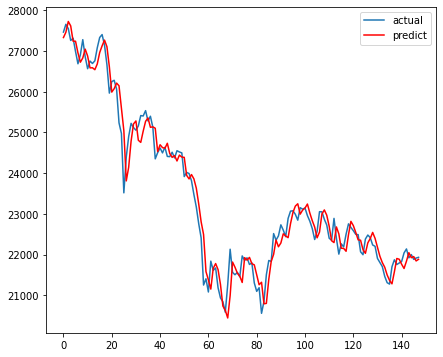

In [146]:

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression()
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
# print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.figure(figsize = (7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()

hsi_4y_ard_predict_plot = y_pred

In [147]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5135135135135135


array([[51, 35],
       [37, 25]], dtype=int64)

In [148]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))

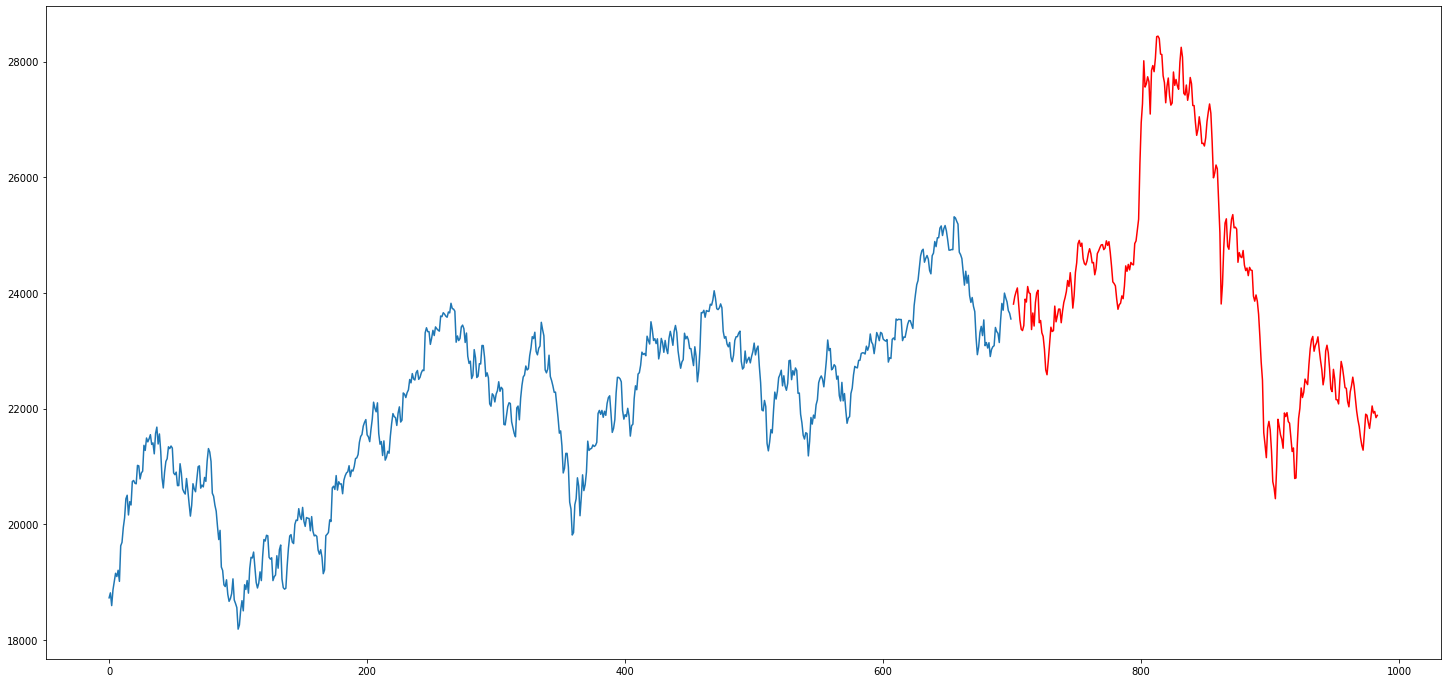

In [150]:

plt.figure(figsize=(25,12))
plt.plot(actual[0:700])
plt.plot(new_predict[701:], color='r')

## ARD Regression HSI_7Y

In [151]:
open = HSI_7y['Open']
close = HSI_7y['Close']
high = HSI_7y['High']
low = HSI_7y['Low']
Adjclose = HSI_7y['Adj Close']
volume = HSI_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
HSI_7y['SMA5'] = pd.DataFrame(SMA5)
HSI_7y['SMA10'] = pd.DataFrame(SMA10)
HSI_7y['SMA14'] = pd.DataFrame(SMA14)
HSI_7y['SMA30'] = pd.DataFrame(SMA30)
HSI_7y['EMA5'] = pd.DataFrame(EMA5)
HSI_7y['EMA10'] = pd.DataFrame(EMA10)
HSI_7y['EMA14'] = pd.DataFrame(EMA14)
HSI_7y['EMA30'] = pd.DataFrame(EMA30)
HSI_7y['MOM5'] = pd.DataFrame(MOM5)
HSI_7y['MOM10'] = pd.DataFrame(MOM10)
HSI_7y['MOM14'] = pd.DataFrame(MOM14)
HSI_7y['RSI14'] = pd.DataFrame(RSI14)
HSI_7y['RSI28'] = pd.DataFrame(RSI28)
HSI_7y['WILLR14'] = pd.DataFrame(WILLR14)
HSI_7y['WILLR28'] = pd.DataFrame(WILLR28)
HSI_7y['AD'] = pd.DataFrame(AD)
HSI_7y['CCI14'] = pd.DataFrame(CCI14)
HSI_7y['CCI28'] = pd.DataFrame(CCI28)
HSI_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
HSI_7y['MACD'] = pd.DataFrame(MACD)
HSI_7y['macdhist'] = pd.DataFrame(macdhist)
HSI_7y['STOCHK'] = pd.DataFrame(STOCHK)
HSI_7y['STOCHD'] = pd.DataFrame(STOCHD)
hsi_cor7y = HSI_7y

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = hsi_cor7y
y = hsi_cor7y['Close'].shift(-1)
y.fillna(hsi_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0      1      2      3      4      5     6     7      8      9   ...  \
0     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
1     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
2     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
3     0.000 -0.000 -0.000 -0.000  0.000 -0.000 0.000 0.000  0.000  0.000  ...   
4    -1.635 -0.000 -0.000 -0.000 -1.637 -0.000 0.000 0.000  0.000  0.000  ...   
...     ...    ...    ...    ...    ...    ...   ...   ...    ...    ...  ...   
1716  0.625  0.664  0.724  0.743  0.625  0.671 0.694 0.730 -0.617 -0.428  ...   
1717  0.597  0.661  0.687  0.743  0.606  0.653 0.678 0.721 -0.780 -0.172  ...   
1718  0.575  0.652  0.656  0.740  0.575  0.628 0.656 0.708 -0.607 -0.407  ...   
1719  0.552  0.630  0.641  0.738  0.557  0.609 0.639 0.697 -0.651 -0.884  ...   
1720  0.566  0.608  0.636  0.735  0.582  0.613 0.638 0.693  0.345 -0.879  ...   

         13     14     15  

In [153]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False  True False  True False False False  True  True False False
 False False False False False False False False False False False]
[ 1  2  1 13  1 17  9 19  1  1 10  3 11  8 16  6 18 15 14  4 12  7  5]


In [154]:
mod_X = final_X.iloc[:, [0,1,4,5,6]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1462, 5)

[28933.34953386 29053.91313594 29229.12235938 29198.52917226
 28978.53175652 29066.40256372 29168.35929592 29256.46500345
 29363.81972433 29445.98300548 29510.15962793 29711.03636911
 29822.58851229 30246.11772482 30450.10971603 30580.13990717
 30665.07381872 30654.30411847 30792.92092701 30869.09090861
 30922.3128895  31125.1047078  31144.76261928 31545.78193559
 31765.99221182 31906.81897654 32057.84730377 32108.28747525
 32557.26495458 32755.44233981 32587.15423883 32783.50403353
 32692.46930212 32526.72018742 32638.38691796 32443.67068924
 32460.53061043 32234.77571615 30987.8301167  30340.84063372
 30222.18053603 29838.59881084 29838.02801613 29876.56942183
 30434.50603891 31275.36622104 31319.18395673 31567.67393716
 31213.36108149 31249.17561505 31540.3390147  31344.84531249
 31027.28023096 30841.24972422 30530.92444673 30062.60236203
 30267.52954802 30191.46272297 30575.70987175 30981.69453493
 31396.31758261 31691.48644667 31506.7099832  31479.31887594
 31403.55546983 31426.74

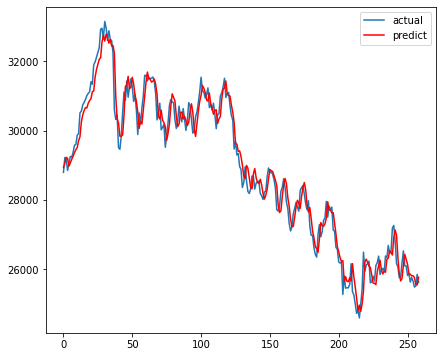

In [155]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.figure(figsize=(7,6))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.legend(['actual','predict'])
plt.show()
hsi_7y_ard_predict_plot = y_pred

In [156]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.528957528957529


array([[69, 52],
       [70, 68]], dtype=int64)

In [157]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(1721, 1)
(1721, 1)


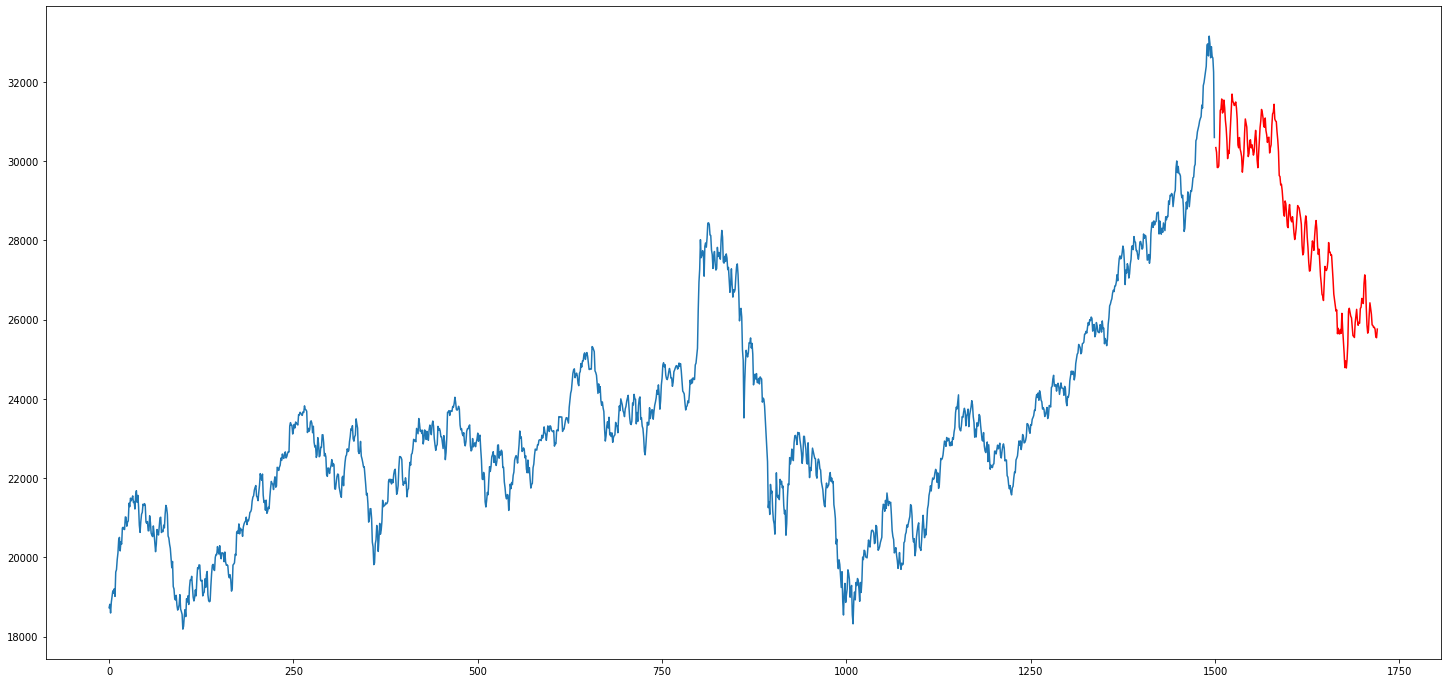

In [158]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## ARD Regression SSE_4Y

In [159]:
open = SSE_4y['Open']
close = SSE_4y['Close']
high = SSE_4y['High']
low = SSE_4y['Low']
Adjclose = SSE_4y['Adj Close']
volume = SSE_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
SSE_4y['SMA5'] = pd.DataFrame(SMA5)
SSE_4y['SMA10'] = pd.DataFrame(SMA10)
SSE_4y['SMA14'] = pd.DataFrame(SMA14)
SSE_4y['SMA30'] = pd.DataFrame(SMA30)
SSE_4y['EMA5'] = pd.DataFrame(EMA5)
SSE_4y['EMA10'] = pd.DataFrame(EMA10)
SSE_4y['EMA14'] = pd.DataFrame(EMA14)
SSE_4y['EMA30'] = pd.DataFrame(EMA30)
SSE_4y['MOM5'] = pd.DataFrame(MOM5)
SSE_4y['MOM10'] = pd.DataFrame(MOM10)
SSE_4y['MOM14'] = pd.DataFrame(MOM14)
SSE_4y['RSI14'] = pd.DataFrame(RSI14)
SSE_4y['RSI28'] = pd.DataFrame(RSI28)
SSE_4y['WILLR14'] = pd.DataFrame(WILLR14)
SSE_4y['WILLR28'] = pd.DataFrame(WILLR28)
SSE_4y['AD'] = pd.DataFrame(AD)
SSE_4y['CCI14'] = pd.DataFrame(CCI14)
SSE_4y['CCI28'] = pd.DataFrame(CCI28)
SSE_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
SSE_4y['MACD'] = pd.DataFrame(MACD)
SSE_4y['macdhist'] = pd.DataFrame(macdhist)
SSE_4y['STOCHK'] = pd.DataFrame(STOCHK)
SSE_4y['STOCHD'] = pd.DataFrame(STOCHD)
sse_cor4y = SSE_4y

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = sse_cor4y
y = sse_cor4y['Close'].shift(-1)
y.fillna(sse_cor4y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

        0     1     2     3      4     5      6     7      8      9   ...  \
0    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
1    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
2    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
3    0.000 0.000 0.000 0.000  0.000 0.000 -0.000 0.000  0.000  0.000  ...   
4   -0.546 0.000 0.000 0.000 -0.547 0.000 -0.000 0.000  0.000  0.000  ...   
..     ...   ...   ...   ...    ...   ...    ...   ...    ...    ...  ...   
964  1.440 1.385 1.342 1.386  1.419 1.398  1.389 1.383  0.338  0.964  ...   
965  1.410 1.387 1.348 1.382  1.380 1.383  1.380 1.382 -0.932 -0.006  ...   
966  1.385 1.394 1.357 1.380  1.368 1.378  1.378 1.384 -0.766  0.211  ...   
967  1.368 1.402 1.369 1.380  1.364 1.376  1.378 1.386 -0.566  0.228  ...   
968  1.347 1.397 1.379 1.377  1.346 1.366  1.372 1.385 -0.647 -0.296  ...   

        13    14     15     16     17    18    19     20     21     22  
0 

In [161]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False  True False  True False False False  True  True False False
 False False False False False False False False False False False]
[ 1 19  1 11  1 14 12 10  1  1 18  7  8  9 16  4  3 13 17 15  5  2  6]


In [162]:
mod_X = final_X.iloc[:, [0,4,8,14,19]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(823, 5)

[4708.79154942 4806.93407524 4868.86222941 5006.09181685 5061.0384337
 5102.486157   5109.39753584 5120.07546811 5124.37742069 5144.07285213
 5055.84160594 4914.28649205 4931.91227736 4783.96031917 4499.05081892
 4521.11419784 4635.67344847 4514.33288242 4283.10109594 4144.19309489
 4192.61650601 4015.12693169 3925.54602043 3778.94322507 3777.7281708
 3661.30842888 3542.96748661 3674.59146504 3867.1428015  3953.2960764
 3972.85847378 3923.02626008 3829.86872367 3876.96445832 3921.67154535
 3991.40580541 4045.29500387 4114.82254326 4062.57155824 3788.4952467
 3652.45921441 3697.13749726 3628.89137211 3622.32247045 3667.19892612
 3751.59722964 3687.18544868 3680.24759693 3739.59595569 3900.02312372
 3914.14193388 3923.25298933 3975.35700901 3965.47979113 3952.55344997
 3779.74031075 3776.27573814 3643.30134454 3490.37877837 3215.89999782
 3001.01340234 2860.64546513 2974.79515947 3160.19190135 3262.25920719
 3284.02387735 3245.08188476 3109.66605425 3116.20533328 3197.75544042
 3199.5102

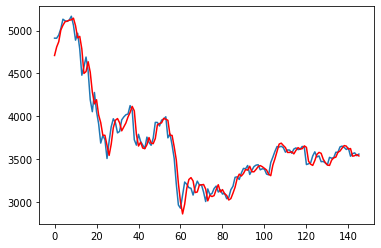

In [163]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print(y_pred)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.show()
sse_4y_ard_predict_plot = y_pred

In [164]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5068493150684932


array([[33, 37],
       [35, 41]], dtype=int64)

In [165]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(969, 1)
(969, 1)


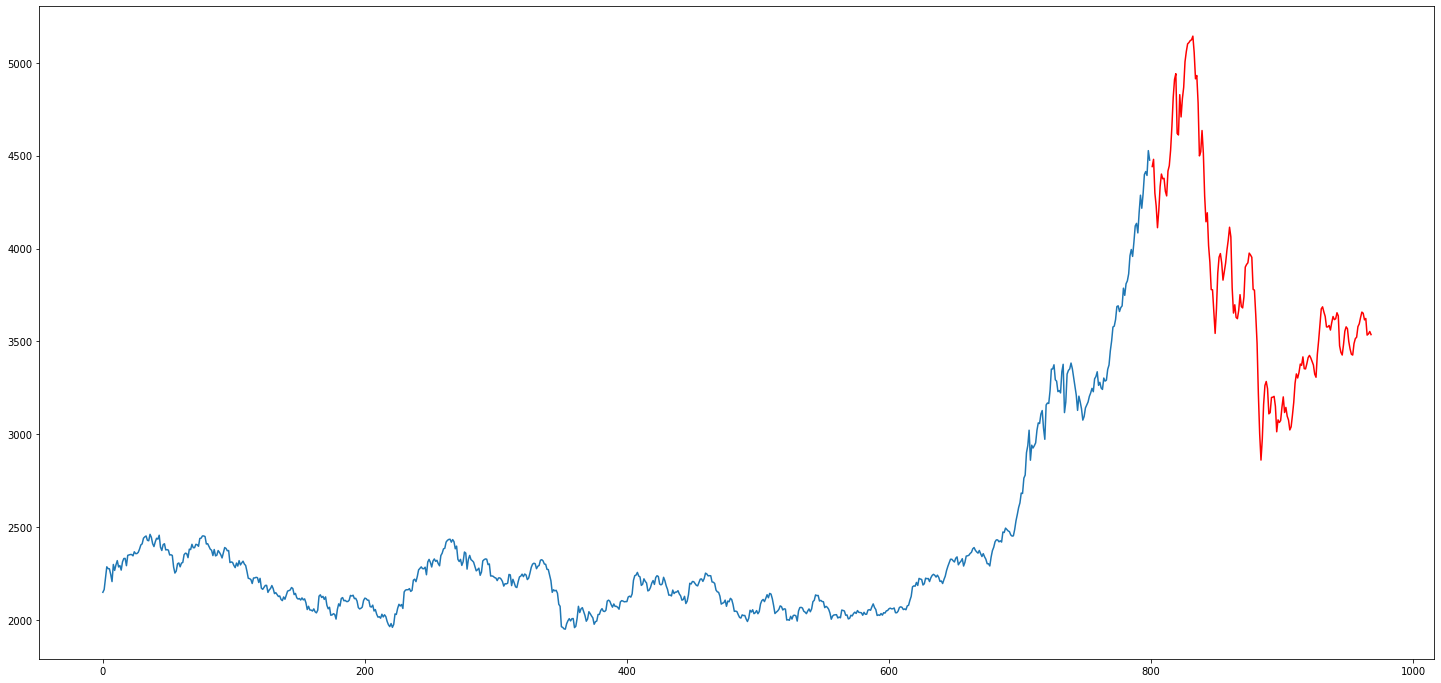

In [166]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:800])
plt.plot(new_predict[801:], color='r')

## ARD Regression SSE_7Y

In [167]:
open = SSE_7y['Open']
close = SSE_7y['Close']
high = SSE_7y['High']
low = SSE_7y['Low']
volume = SSE_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
SSE_7y['SMA5'] = pd.DataFrame(SMA5)
SSE_7y['SMA10'] = pd.DataFrame(SMA10)
SSE_7y['SMA14'] = pd.DataFrame(SMA14)
SSE_7y['SMA30'] = pd.DataFrame(SMA30)
SSE_7y['EMA5'] = pd.DataFrame(EMA5)
SSE_7y['EMA10'] = pd.DataFrame(EMA10)
SSE_7y['EMA14'] = pd.DataFrame(EMA14)
SSE_7y['EMA30'] = pd.DataFrame(EMA30)
SSE_7y['MOM5'] = pd.DataFrame(MOM5)
SSE_7y['MOM10'] = pd.DataFrame(MOM10)
SSE_7y['MOM14'] = pd.DataFrame(MOM14)
SSE_7y['RSI14'] = pd.DataFrame(RSI14)
SSE_7y['RSI28'] = pd.DataFrame(RSI28)
SSE_7y['WILLR14'] = pd.DataFrame(WILLR14)
SSE_7y['WILLR28'] = pd.DataFrame(WILLR28)
SSE_7y['AD'] = pd.DataFrame(AD)
SSE_7y['CCI14'] = pd.DataFrame(CCI14)
SSE_7y['CCI28'] = pd.DataFrame(CCI28)
SSE_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
SSE_7y['MACD'] = pd.DataFrame(MACD)
SSE_7y['macdhist'] = pd.DataFrame(macdhist)
SSE_7y['STOCHK'] = pd.DataFrame(STOCHK)
SSE_7y['STOCHD'] = pd.DataFrame(STOCHD)
sse_cor7y = SSE_7y

In [168]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = sse_cor7y
y = sse_cor7y['Close'].shift(-1)
X = X.drop(X.iloc[:,0:6], axis=1)
y.fillna(sse_cor7y['Close'][-3:].mean(), inplace=True)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0      1      2      3      4      5      6      7      8      9   \
0     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
1     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
2     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
3     0.000  0.000  0.000  0.000  0.000  0.000  0.000 -0.000 -0.000 -0.000   
4    -0.977  0.000  0.000  0.000 -0.978  0.000  0.000 -0.000 -0.000 -0.000   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1695 -0.419 -0.371 -0.355 -0.324 -0.419 -0.389 -0.374 -0.346 -0.675 -0.376   
1696 -0.442 -0.385 -0.372 -0.332 -0.439 -0.406 -0.389 -0.356 -0.683 -0.577   
1697 -0.459 -0.402 -0.385 -0.339 -0.456 -0.422 -0.404 -0.366 -0.490 -0.669   
1698 -0.477 -0.427 -0.399 -0.350 -0.475 -0.440 -0.419 -0.377 -0.508 -0.968   
1699 -0.484 -0.443 -0.410 -0.360 -0.482 -0.451 -0.431 -0.386 -0.218 -0.644   

      ...     13     14     15     16     17     18     19     

In [169]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False  True False  True False False False  True  True False False
 False False False False False False False False False False False]
[ 1 18  1 10  1 12 13 11  1  1  8 19  7  3 16  6  4 15 17 14  9  2  5]


In [170]:
mod_X = final_X.iloc[:, [0,4,8,12,19]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1445, 5)

[3293.88654019 3263.908215   3252.28060471 3283.77715801 3277.36192685
 3292.71958169 3298.52943257 3282.2633082  3291.78386292 3273.86344179
 3283.28045476 3296.5914235  3337.60997534 3360.75360228 3390.78445034
 3395.92825822 3409.58447196 3408.42036569 3414.95498607 3419.21365738
 3424.48769401 3408.34391326 3426.54069102 3437.37967593 3466.82523764
 3487.20008648 3508.57556516 3542.83597212 3563.47084399 3555.59182168
 3561.29821302 3530.27337644 3484.68638165 3468.22502328 3440.13430066
 3444.02653804 3476.24448664 3396.49482757 3322.67163495 3263.46886138
 3131.59475299 3111.98953654 3159.59547829 3190.25702563 3263.22335605
 3320.75394887 3345.9400882  3314.07602023 3273.87224873 3255.48483335
 3236.11581615 3229.99439041 3269.83233091 3271.38702452 3280.25637665
 3302.2895336  3320.76954761 3307.13713341 3295.21819454 3284.0549889
 3260.40553195 3260.41650529 3276.66335533 3277.4318675  3262.86746345
 3173.75434922 3125.67937953 3133.2541767  3106.32193549 3138.91273447
 3176.6

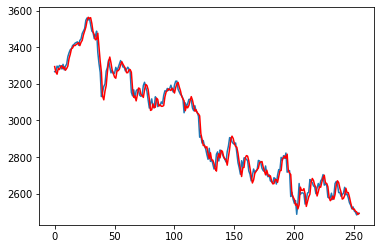

In [171]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.show()
sse_7y_ard_predict_plot = y_pred

In [172]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5294117647058824


array([[75, 60],
       [60, 60]], dtype=int64)

In [173]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))

(1700, 1)
(1700, 1)


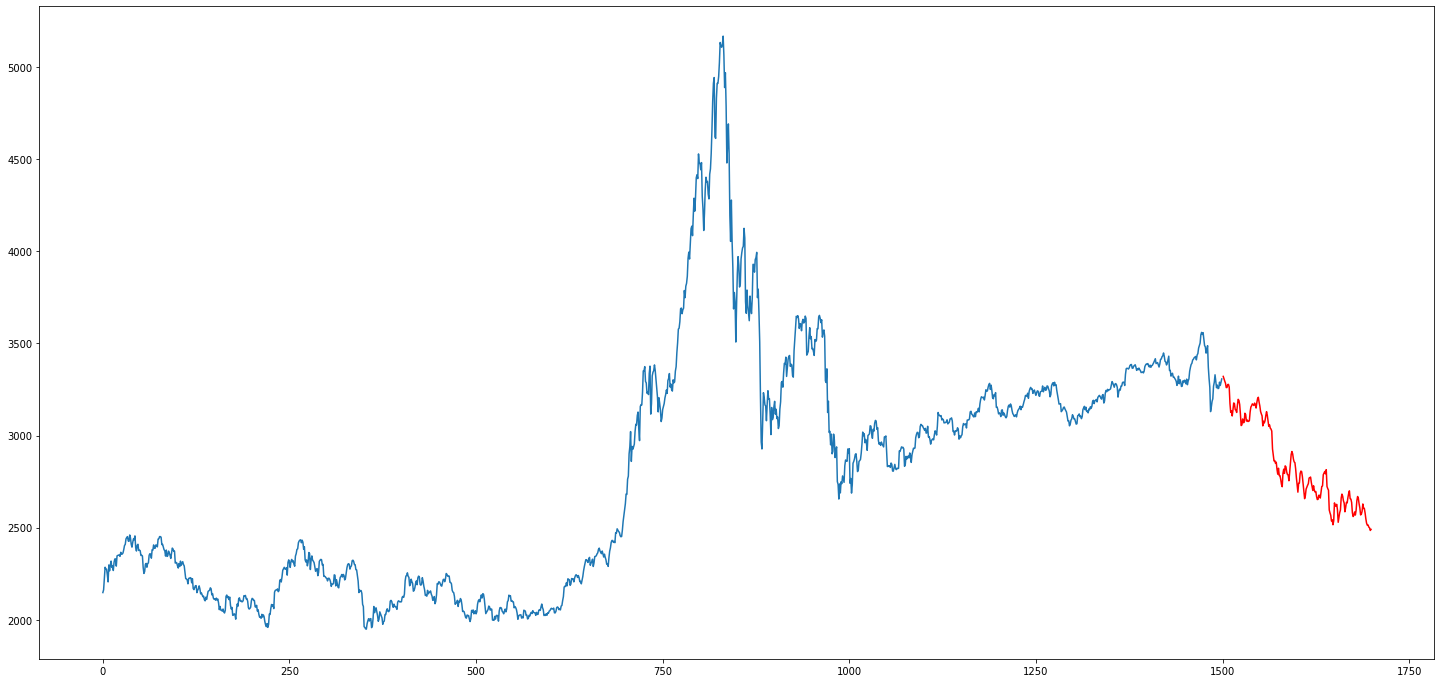

In [174]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## ARD Regression DJI_4Y

In [175]:
open = DJI_4y['Open']
close = DJI_4y['Close']
high = DJI_4y['High']
low = DJI_4y['Low']
Adjclose = DJI_4y['Adj Close']
volume = DJI_4y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
DJI_4y['SMA5'] = pd.DataFrame(SMA5)
DJI_4y['SMA10'] = pd.DataFrame(SMA10)
DJI_4y['SMA14'] = pd.DataFrame(SMA14)
DJI_4y['SMA30'] = pd.DataFrame(SMA30)
DJI_4y['EMA5'] = pd.DataFrame(EMA5)
DJI_4y['EMA10'] = pd.DataFrame(EMA10)
DJI_4y['EMA14'] = pd.DataFrame(EMA14)
DJI_4y['EMA30'] = pd.DataFrame(EMA30)
DJI_4y['MOM5'] = pd.DataFrame(MOM5)
DJI_4y['MOM10'] = pd.DataFrame(MOM10)
DJI_4y['MOM14'] = pd.DataFrame(MOM14)
DJI_4y['RSI14'] = pd.DataFrame(RSI14)
DJI_4y['RSI28'] = pd.DataFrame(RSI28)
DJI_4y['WILLR14'] = pd.DataFrame(WILLR14)
DJI_4y['WILLR28'] = pd.DataFrame(WILLR28)
DJI_4y['AD'] = pd.DataFrame(AD)
DJI_4y['CCI14'] = pd.DataFrame(CCI14)
DJI_4y['CCI28'] = pd.DataFrame(CCI28)
DJI_4y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
DJI_4y['MACD'] = pd.DataFrame(MACD)
DJI_4y['macdhist'] = pd.DataFrame(macdhist)
DJI_4y['STOCHK'] = pd.DataFrame(STOCHK)
DJI_4y['STOCHD'] = pd.DataFrame(STOCHD)
dji_cor4y = DJI_4y

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = dji_cor4y
y = dji_cor4y['Close'].shift(-1)
X = X.drop(X.iloc[:,0:6], axis=1)
y.fillna(dji_cor4y['Close'][-3:].mean(), inplace=True)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0     1      2     3      4     5      6      7      8      9   ...  \
0     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
1     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
2     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
3     0.000 0.000 -0.000 0.000  0.000 0.000 -0.000 -0.000  0.000  0.000  ...   
4    -1.729 0.000 -0.000 0.000 -1.730 0.000 -0.000 -0.000  0.000  0.000  ...   
...     ...   ...    ...   ...    ...   ...    ...    ...    ...    ...  ...   
1001  0.973 1.002  1.030 1.105  1.024 1.029  1.043  1.074  0.117 -0.211  ...   
1002  1.016 1.017  1.022 1.107  1.032 1.033  1.045  1.074  1.429  0.611  ...   
1003  1.067 1.036  1.028 1.116  1.072 1.056  1.061  1.081  1.695  0.868  ...   
1004  1.087 1.040  1.033 1.118  1.078 1.063  1.066  1.083  0.614  0.081  ...   
1005  1.068 1.022  1.027 1.117  1.049 1.051  1.058  1.079 -0.777 -1.078  ...   

         13     14     15     16     17

In [177]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False False  True  True False False False False False False False
  True False False  True False False False False False False False]
[ 1 18 14  1  1 19 12 17  6  2  8  3  1 10 16  1  4  9  5 15 11 13  7]


In [178]:
mod_X = final_X.iloc[:, [0,3,4,13,14]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(855, 5)

[18021.53934534 18032.40531389 17967.73060027 18031.88690007
 17909.824823   17822.04530299 17737.69101419 17715.47370704
 17931.4078675  18022.00129366 17930.10083406 17779.28539235
 17802.42457083 17869.05968969 18085.41393183 18045.31370721
 18095.5748583  18124.13557803 17964.35590606 17882.84385993
 17891.49469156 17643.68899874 17619.88626266 17709.8842366
 17717.00863371 17723.02944419 17753.51041614 17529.83135323
 17500.5541419  17652.19998174 17870.0993301  18046.98144984
 18054.19766988 18055.51657745 18029.43583921 18058.81756883
 17941.96263339 17854.79912818 17752.77945613 17603.36348678
 17502.06789257 17604.39182204 17742.30671676 17785.33178254
 17723.93635363 17573.88833982 17491.35062186 17478.2067337
 17404.61386235 17368.78306595 17546.01453356 17429.26235892
 17439.98009669 17404.71944509 17423.7380154  17536.48440297
 17518.11514561 17371.08695255 17060.74385296 16678.40321682
 16272.90649382 16000.58229577 16331.59939276 16740.02835575
 16868.00483178 16700.6320

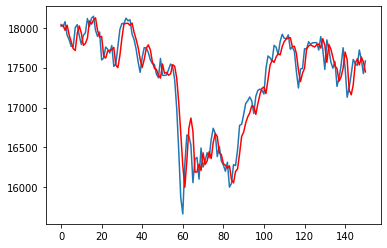

In [179]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.show()
dji_4y_ard_predict_plot = y_pred

In [180]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.4503311258278146


array([[35, 45],
       [38, 33]], dtype=int64)

In [181]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(1006, 1)
(1006, 1)


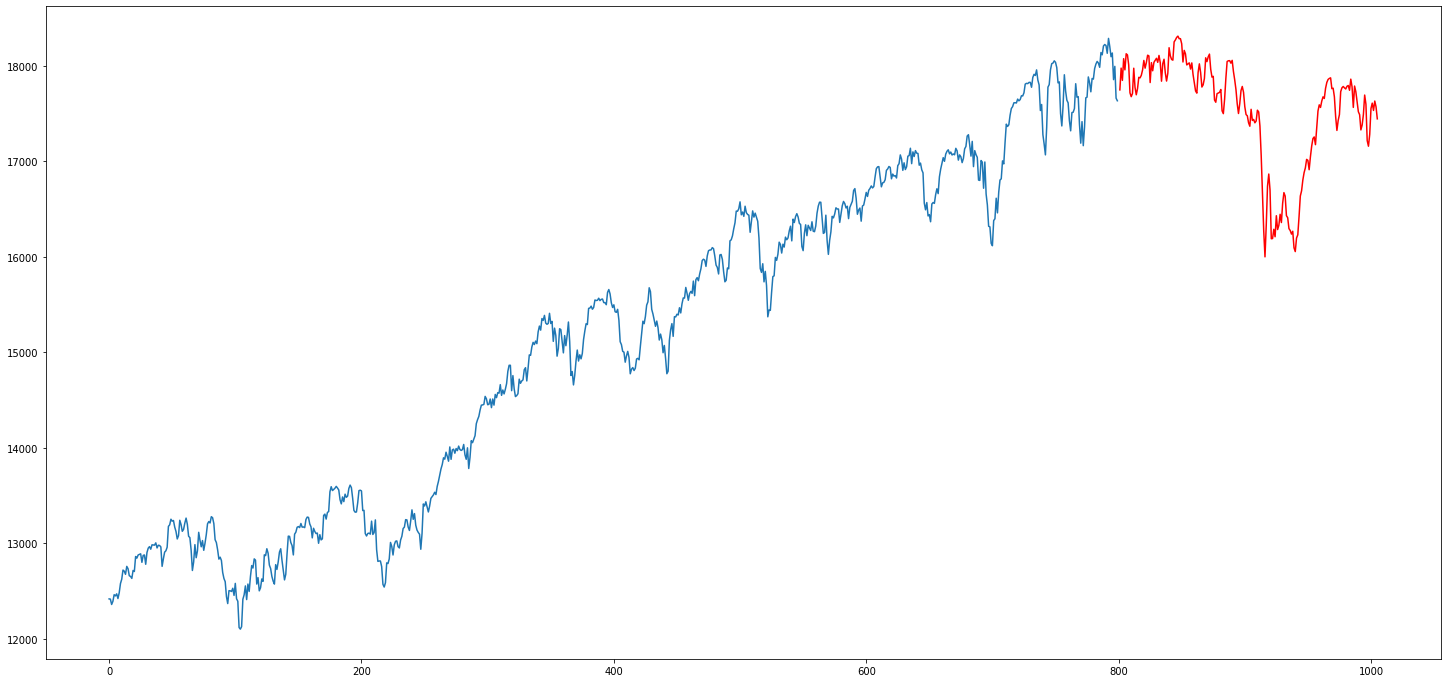

In [182]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:800])
plt.plot(new_predict[801:], color='r')

## ARD Regression DJI_7Y

In [183]:
open = DJI_7y['Open']
close = DJI_7y['Close']
high = DJI_7y['High']
low = DJI_7y['Low']
Adjclose = DJI_7y['Adj Close']
volume = DJI_7y['Volume']
SMA5 = tl.SMA(close, timeperiod=5)
SMA10 = tl.SMA(close, timeperiod=10)
SMA14 = tl.SMA(close, timeperiod=14)
SMA30 = tl.SMA(close, timeperiod=30)
EMA5 = tl.EMA(close, timeperiod=5)
EMA10 = tl.EMA(close, timeperiod=10)
EMA14 = tl.EMA(close, timeperiod=14)
EMA30 = tl.EMA(close, timeperiod=30)
MOM5 = tl.MOM(close, timeperiod=5)
MOM10 = tl.MOM(close, timeperiod=10)
MOM14 = tl.MOM(close, timeperiod=14)
MACD, MACDSIGNAL, macdhist = tl.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
STOCHK, STOCHD = tl.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
RSI14 = tl.RSI(close, timeperiod=14)
RSI28 = tl.RSI(close, timeperiod=28)
WILLR14 = tl.WILLR(high, low, close, timeperiod=14)
WILLR28 = tl.WILLR(high, low, close, timeperiod=28)
AD = tl.AD(high, low, close, volume)
CCI14 = tl.CCI(high, low, close, timeperiod=14)    
CCI28 = tl.CCI(high, low, close, timeperiod=28)    
DJI_7y['SMA5'] = pd.DataFrame(SMA5)
DJI_7y['SMA10'] = pd.DataFrame(SMA10)
DJI_7y['SMA14'] = pd.DataFrame(SMA14)
DJI_7y['SMA30'] = pd.DataFrame(SMA30)
DJI_7y['EMA5'] = pd.DataFrame(EMA5)
DJI_7y['EMA10'] = pd.DataFrame(EMA10)
DJI_7y['EMA14'] = pd.DataFrame(EMA14)
DJI_7y['EMA30'] = pd.DataFrame(EMA30)
DJI_7y['MOM5'] = pd.DataFrame(MOM5)
DJI_7y['MOM10'] = pd.DataFrame(MOM10)
DJI_7y['MOM14'] = pd.DataFrame(MOM14)
DJI_7y['RSI14'] = pd.DataFrame(RSI14)
DJI_7y['RSI28'] = pd.DataFrame(RSI28)
DJI_7y['WILLR14'] = pd.DataFrame(WILLR14)
DJI_7y['WILLR28'] = pd.DataFrame(WILLR28)
DJI_7y['AD'] = pd.DataFrame(AD)
DJI_7y['CCI14'] = pd.DataFrame(CCI14)
DJI_7y['CCI28'] = pd.DataFrame(CCI28)
DJI_7y['MACDSIGNAL'] = pd.DataFrame(MACDSIGNAL)
DJI_7y['MACD'] = pd.DataFrame(MACD)
DJI_7y['macdhist'] = pd.DataFrame(macdhist)
DJI_7y['STOCHK'] = pd.DataFrame(STOCHK)
DJI_7y['STOCHD'] = pd.DataFrame(STOCHD)
dji_cor7y = DJI_7y

In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

imp = SimpleImputer()

scaler =  StandardScaler()
X = dji_cor7y
y = dji_cor7y['Close'].shift(-1)
y.fillna(dji_cor7y['Close'][-3:].mean(), inplace=True)
X = X.drop(X.iloc[:,0:6], axis=1)
ct = make_column_transformer(
    (imp, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]),
    remainder='passthrough'
)
final_X =pd.DataFrame(ct.fit_transform(X))
final_X = pd.DataFrame(scaler.fit_transform(final_X))

         0     1     2     3      4     5     6     7      8      9   ...  \
0     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
1     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
2     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
3     0.000 0.000 0.000 0.000  0.000 0.000 0.000 0.000  0.000  0.000  ...   
4    -1.498 0.000 0.000 0.000 -1.499 0.000 0.000 0.000  0.000  0.000  ...   
...     ...   ...   ...   ...    ...   ...   ...   ...    ...    ...  ...   
1755  1.214 1.403 1.494 1.693  1.179 1.342 1.429 1.628 -5.491 -5.965  ...   
1756  1.173 1.364 1.454 1.666  1.196 1.323 1.403 1.604 -2.480 -3.440  ...   
1757  1.163 1.328 1.420 1.646  1.230 1.319 1.390 1.586 -0.644 -3.211  ...   
1758  1.174 1.288 1.395 1.626  1.246 1.312 1.376 1.568  0.519 -3.536  ...   
1759  1.220 1.268 1.375 1.611  1.280 1.320 1.374 1.555  2.557 -1.847  ...   

         13     14     15     16     17     18     19     20     21     22 

In [185]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ARDRegression
model = ARDRegression()
rfe = RFE(model, n_features_to_select= 5)
X_rfe = rfe.fit_transform(final_X,y)
model.fit(X_rfe, y)
print(rfe.n_features_)
print(rfe.support_)
print(rfe.ranking_)

5
[ True False False False  True False False False  True False False False
 False False False  True False False  True False False False False]
[ 1 13 19  9  1 15 18  4  1  2 17 12  8  5 14  1 11  3  1 16  7 10  6]


In [186]:
mod_X = final_X.iloc[:, [0,4,8,13,17]].values
mod_y = y.values
X_train, X_test, y_train, y_test = train_test_split(mod_X, mod_y, test_size=0.15, random_state=0, shuffle=False)

(1496, 5)

[24481.66401612 24566.67146893 24521.00105685 24605.57543135
 24715.24024408 24726.89501313 24719.66745137 24758.00699203
 24727.07759306 24721.88111839 24762.09816247 24826.14177965
 24740.57332617 24815.02912643 24904.76686617 25033.66829765
 25237.35191741 25297.86474111 25356.36352982 25346.31567614
 25476.34409958 25671.54339277 25730.91229252 25992.1925061
 25993.32145584 26011.46568133 26112.95084328 26149.89295784
 26176.34683658 26319.18282644 26510.23390237 26445.14788236
 26161.35790328 26098.73645652 26083.50371566 25607.91824055
 24753.65840086 24839.81606261 24840.56245983 24218.44233148
 24354.54905323 24644.00880714 24666.83457072 24941.39009059
 25257.75357792 25232.92206691 25010.71943937 24807.75962684
 24822.28293936 25109.71246573 25538.97242103 25508.62663148
 25194.79260536 24714.29853822 24434.23268992 24646.1693169
 24834.08094861 24883.67608801 24954.09070495 25235.93654368
 25177.66834885 25057.52359413 24811.46776282 24772.94616231
 24812.25382695 24658.1988

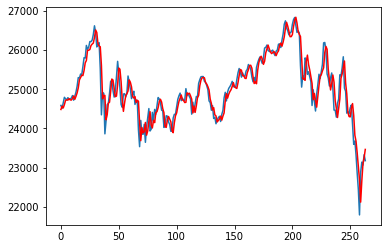

In [187]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
model = ARDRegression(fit_intercept=True)
model.fit(mod_X, mod_y)
y_pred = model.predict(X_test)
r2 = model.score(mod_X, mod_y)
print("R-sqrt = ", r2)
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
plt.plot(range(len(X_test)), y_test)
plt.plot(range(len(X_test)), y_pred, color='r')
plt.show()
dji_7y_ard_predict_plot = y_pred

In [188]:
prediction = np.where(pd.DataFrame(y_pred).shift(-1) > pd.DataFrame(y_pred), 1, 0)
real = np.where(pd.DataFrame(y_test).shift(-1) > pd.DataFrame(y_test), 1, 0)
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(real, prediction))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(real, prediction)
cm

Accuracy Score: 0.5643939393939394


array([[65, 60],
       [55, 84]], dtype=int64)

In [189]:
predict = pd.DataFrame(y_pred)
real = pd.DataFrame(y_train)
actual = pd.DataFrame(np.append(real, y_test))
new_predict = pd.DataFrame(np.append(real, y_pred))


(1760, 1)
(1760, 1)


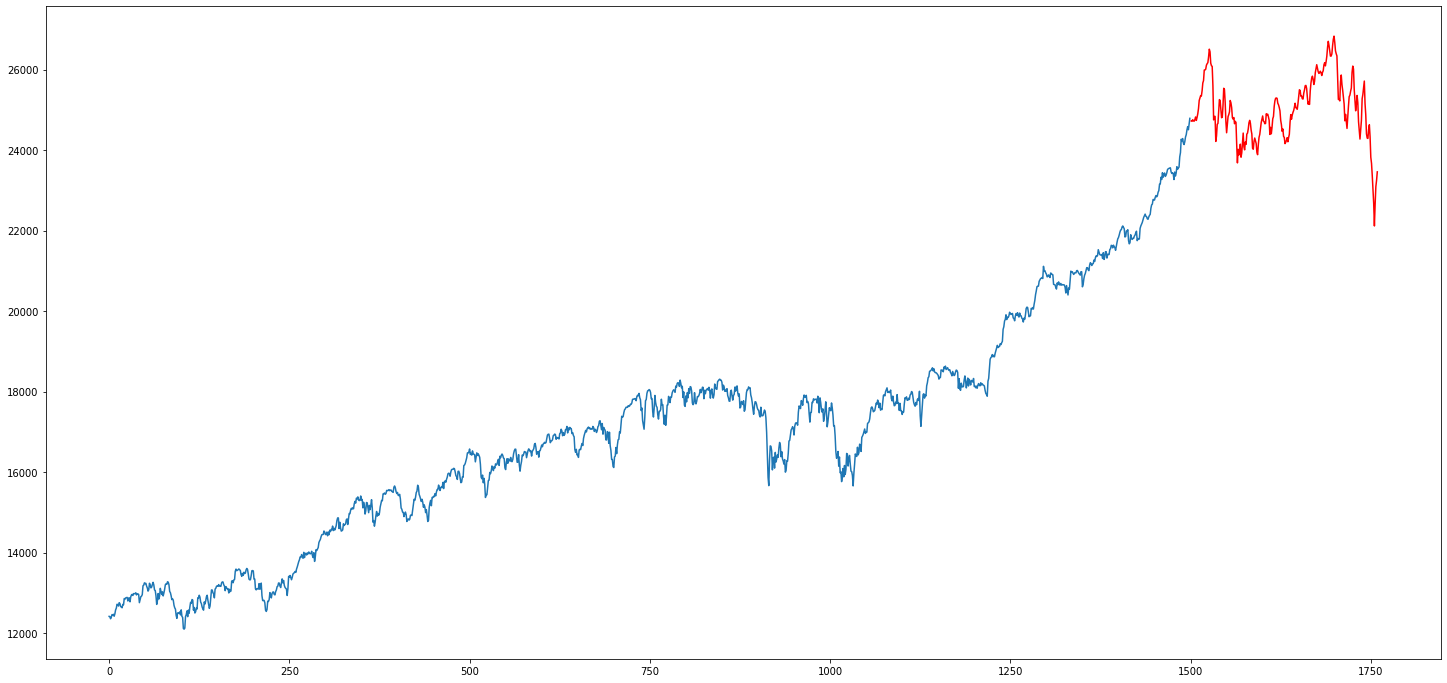

In [190]:
plt.figure(figsize=(25,12))
plt.plot(actual[0:1500])
plt.plot(new_predict[1501:], color='r')

## -------------------------------------------------------------------------------------------------------------------------

## train data vs test data

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of Nikkei 4y')

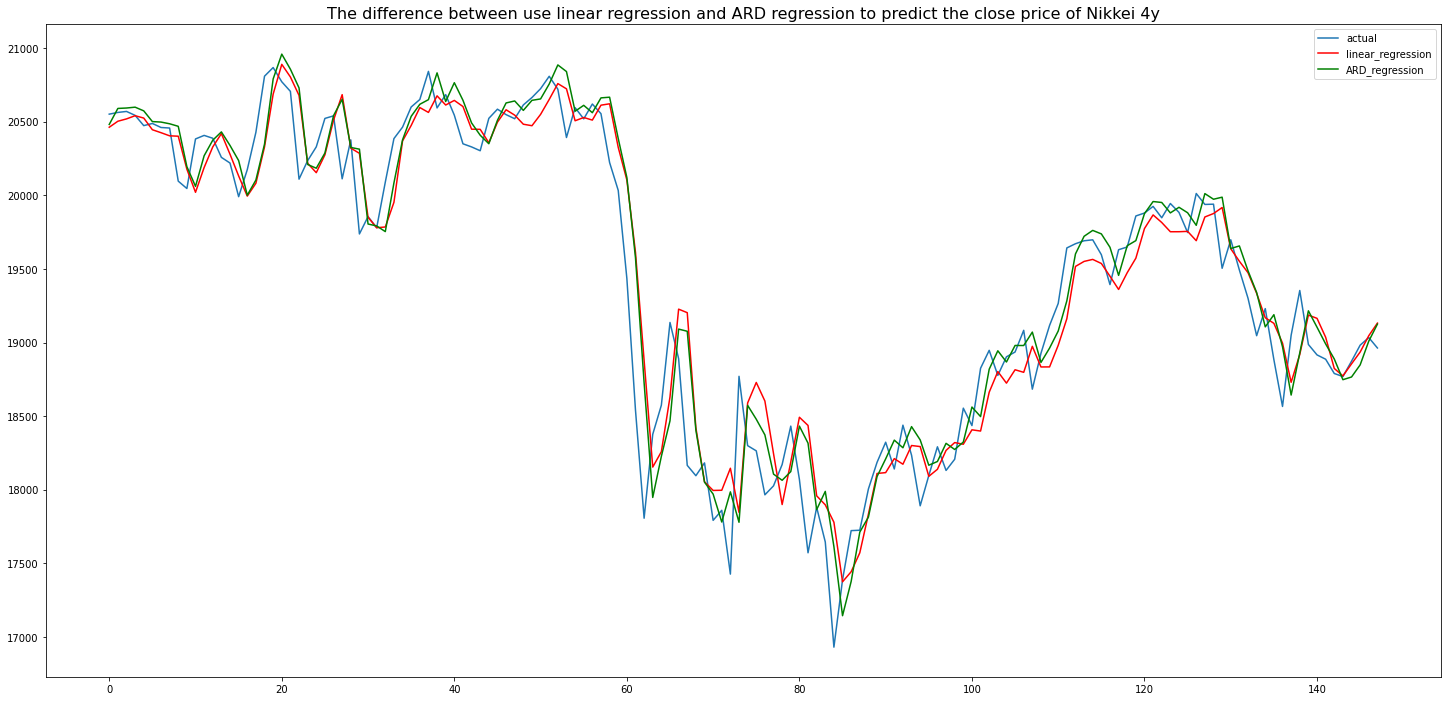

In [191]:

plt.figure(figsize=(25,12))
plt.plot(n225_4y_realplot_X,n225_4y_realplot_y)
plt.plot(n225_4y_realplot_X,n225_4y_linear_predict_plot,color='r')
plt.plot(n225_4y_realplot_X,n225_4y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Nikkei 4y',size=16)


In [1]:

plt.figure(figsize=(25,12))
plt.plot(n225_7y_realplot_X,n225_7y_realplot_y)
plt.plot(n225_7y_realplot_X,n225_7y_linear_predict_plot,color='r')
plt.plot(n225_7y_realplot_X,n225_7y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Nikkei 7y',size=16)

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of Hang seng Index 4y')

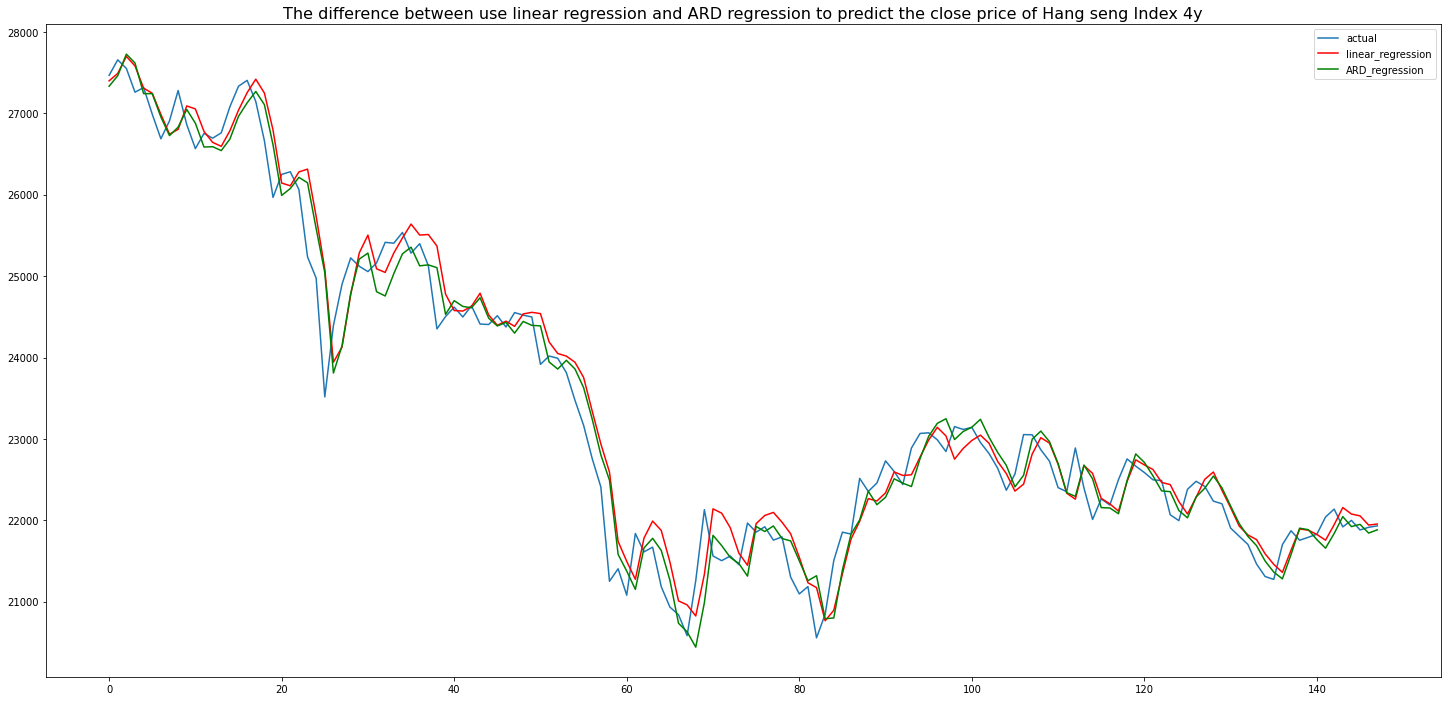

In [193]:

plt.figure(figsize=(25,12))
plt.plot(hsi_4y_realplot_X,hsi_4y_realplot_y)
plt.plot(hsi_4y_realplot_X,hsi_4y_linear_predict_plot,color='r')
plt.plot(hsi_4y_realplot_X,hsi_4y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Hang seng Index 4y',size=16)

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of Hang seng Index 7y')

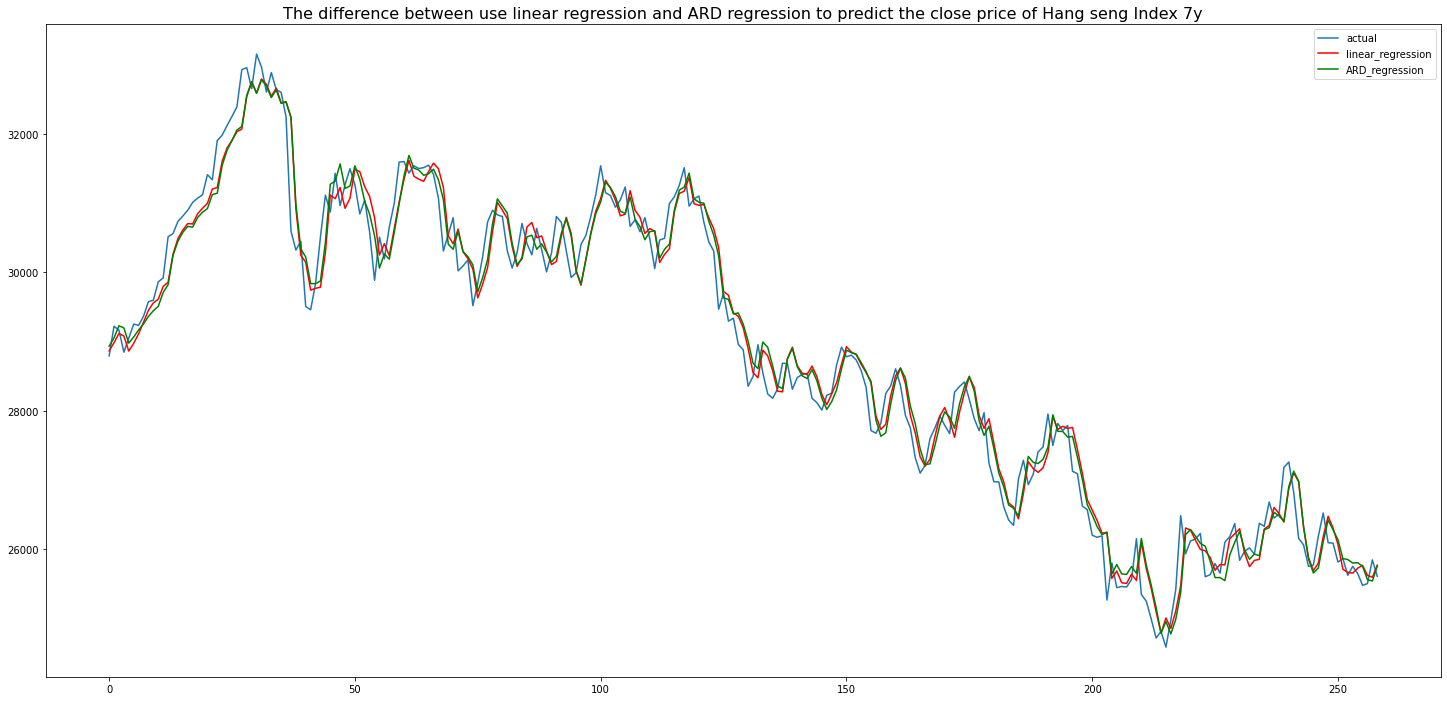

In [194]:

plt.figure(figsize=(25,12))
plt.plot(hsi_7y_realplot_X,hsi_7y_realplot_y)
plt.plot(hsi_7y_realplot_X,hsi_7y_linear_predict_plot,color='r')
plt.plot(hsi_7y_realplot_X,hsi_7y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Hang seng Index 7y',size=16)

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of SSE Composite 4y')

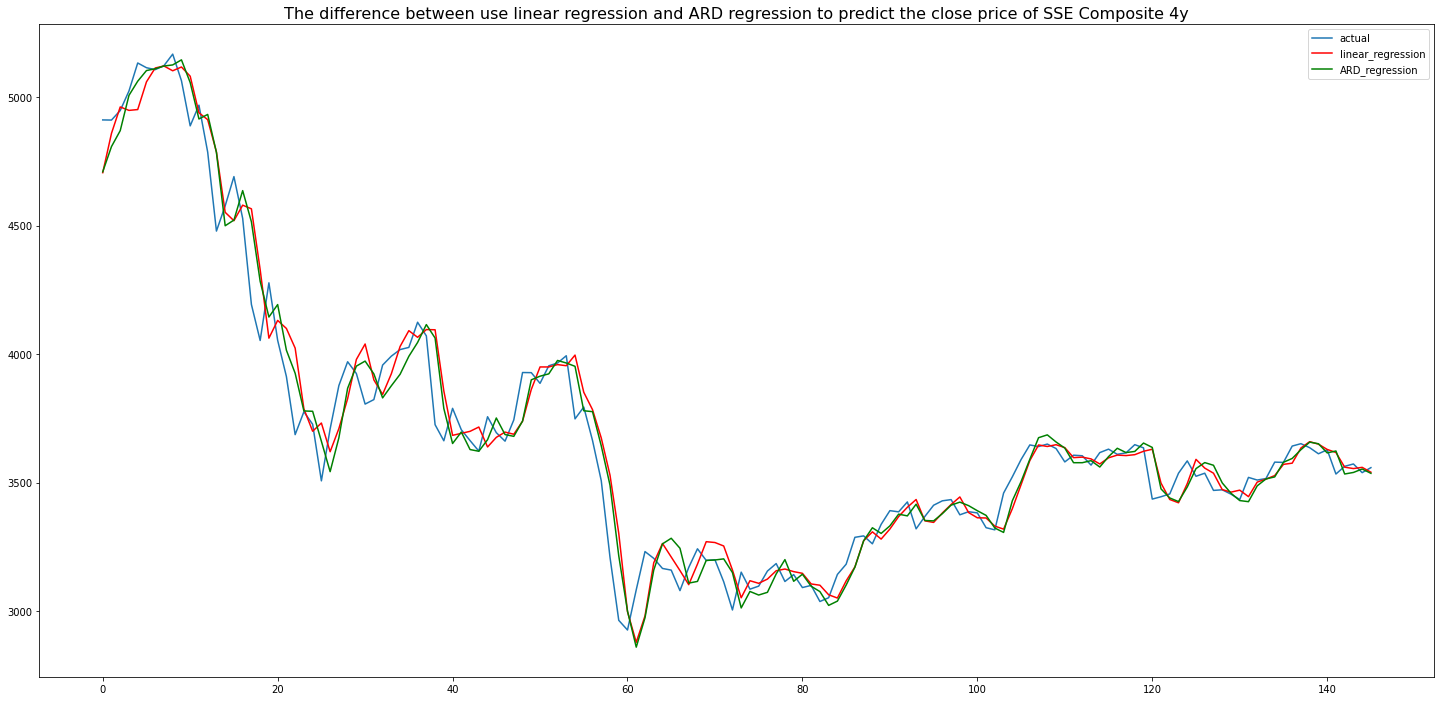

In [195]:

plt.figure(figsize=(25,12))
plt.plot(sse_4y_realplot_X,sse_4y_realplot_y)
plt.plot(sse_4y_realplot_X,sse_4y_linear_predict_plot,color='r')
plt.plot(sse_4y_realplot_X,sse_4y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of SSE Composite 4y',size=16)


Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of SSE Composite 7y')

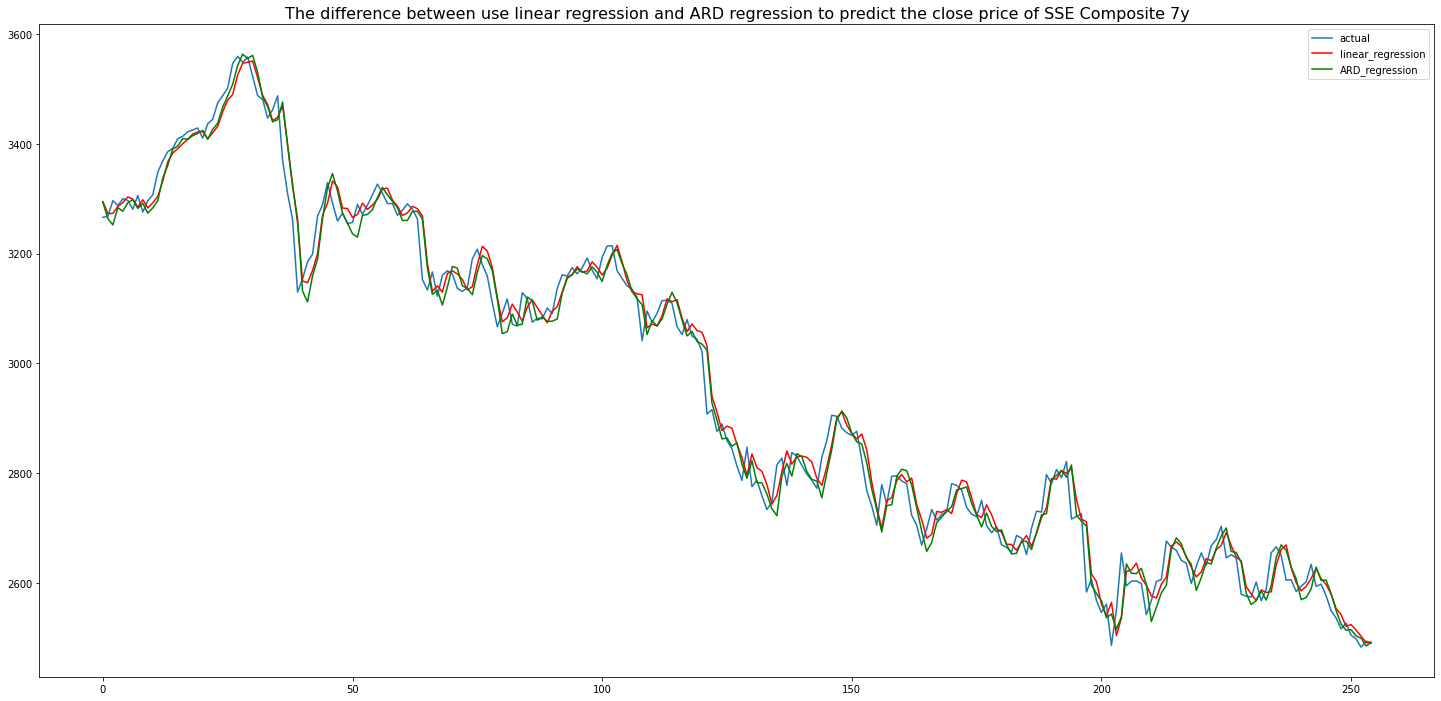

In [196]:

plt.figure(figsize=(25,12))
plt.plot(sse_7y_realplot_X,sse_7y_realplot_y)
plt.plot(sse_7y_realplot_X,sse_7y_linear_predict_plot,color='r')
plt.plot(sse_7y_realplot_X,sse_7y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of SSE Composite 7y',size=16)

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of Dow jone industrial 4y')

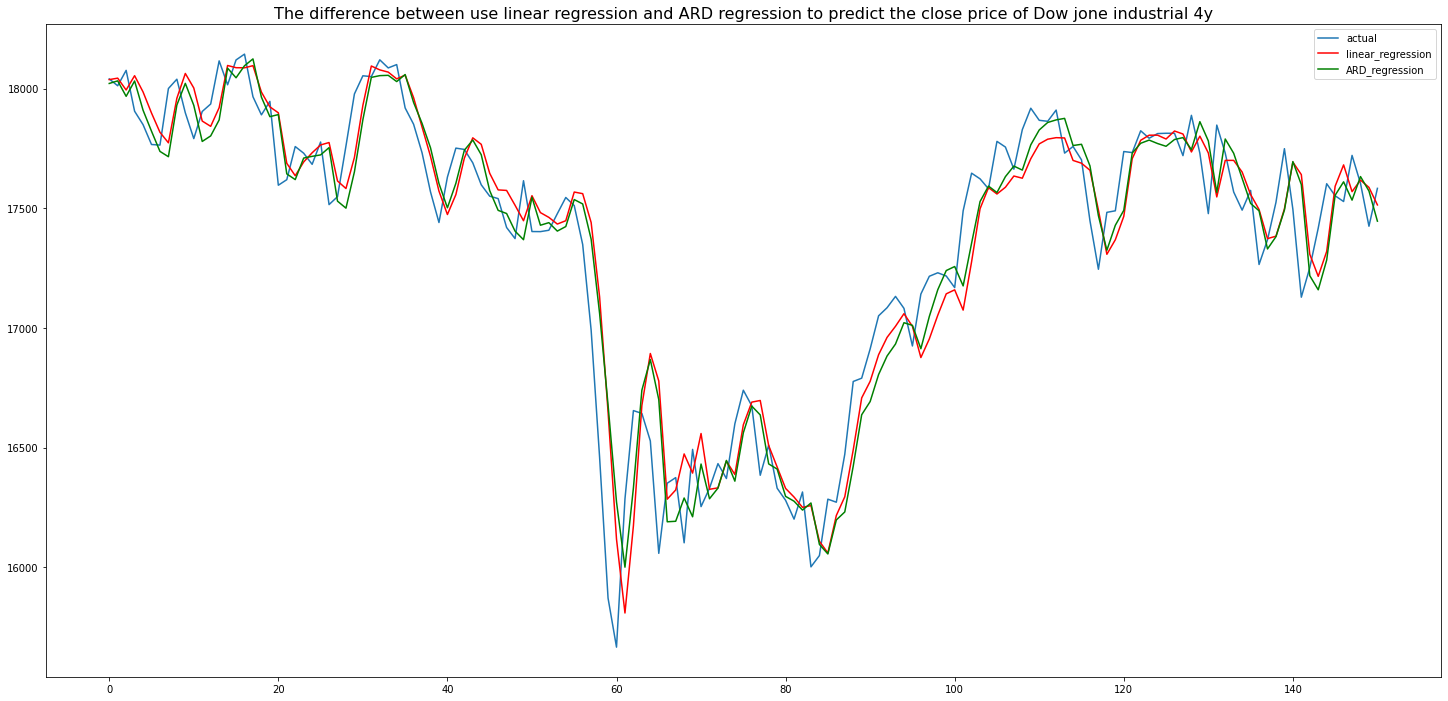

In [197]:

plt.figure(figsize=(25,12))
plt.plot(dji_4y_realplot_X,dji_4y_realplot_y)
plt.plot(dji_4y_realplot_X,dji_4y_linear_predict_plot,color='r')
plt.plot(dji_4y_realplot_X,dji_4y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Dow jone industrial 4y',size=16)

Text(0.5, 1.0, 'The difference between use linear regression and ARD regression to predict the close price of Dow jone industrial 7y')

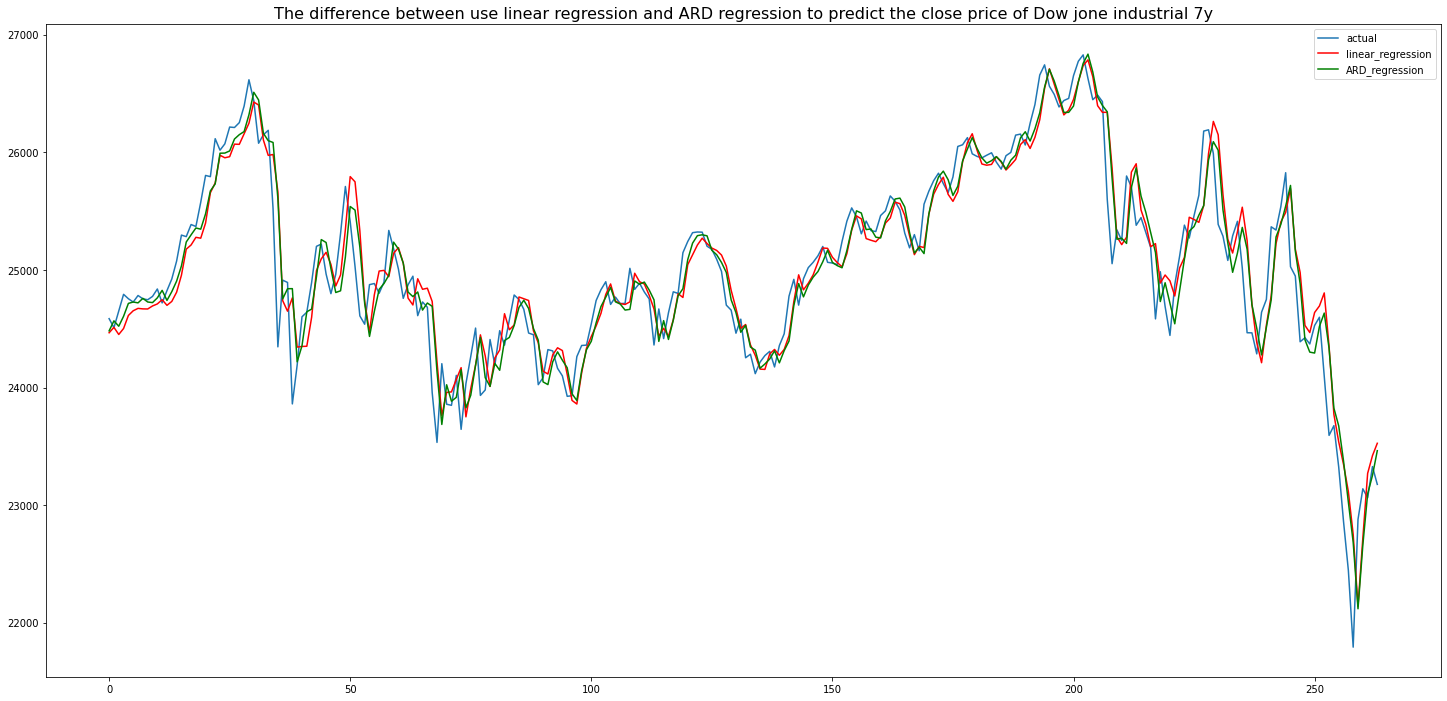

In [198]:

plt.figure(figsize=(25,12))
plt.plot(dji_7y_realplot_X,dji_7y_realplot_y)
plt.plot(dji_7y_realplot_X,dji_7y_linear_predict_plot,color='r')
plt.plot(dji_7y_realplot_X,dji_7y_ard_predict_plot, color='g')
plt.legend(['actual','linear_regression','ARD_regression'])
plt.title('The difference between use linear regression and ARD regression to predict the close price of Dow jone industrial 7y',size=16)